## Backup

### assign faces with deepface

In [ ]:
# def assign_faces_to_persons(accumulated_faces , similarity_threshold=0.55):
#     """
#     Assign faces to existing persons or create new ones
#     Replaces the cluster_faces function
#     """
#     # Get next available person ID
#     existing_persons = set()
#     if os.path.exists(persons_dir):
#         for folder in os.listdir(persons_dir):
#             if folder.startswith("person_") and os.path.isdir(os.path.join(persons_dir, folder)):
#                 try:
#                     person_num = int(folder.split("_")[1])
#                     existing_persons.add(person_num)
#                 except:
#                     continue
    
#     next_person_id = 0
#     while next_person_id in existing_persons:
#         next_person_id += 1
#     results = find_best_matching_person(accumulated_faces)

#     for persons_results in results:
#         # Find best matching person
#         matched_person = persons_results["person_id"]
#         similarity = persons_results["distance"]

#         print ("Matched Person:",matched_person,"Similarity:",similarity)
        
#         if matched_person and similarity<= similarity_threshold:
#             # Assign to existing person
#             person_folder = os.path.join(persons_dir, matched_person)
#             temp_folder = os.path.join(person_folder, "temp")
#         else:
#             # Create new person
#             matched_person = f"person_{next_person_id}"
#             existing_persons.add(next_person_id)  
#             person_folder = os.path.join(persons_dir, matched_person)
#             temp_folder = os.path.join(person_folder, "temp")
            
#             # Create folders
#             os.makedirs(person_folder, exist_ok=True)
#             os.makedirs(temp_folder, exist_ok=True)
            
#             next_person_id += 1
#             while next_person_id in existing_persons:
#                 next_person_id += 1
            
#             print(f"Created new person: {matched_person}")
        
#         # Ensure temp folder exists
#         os.makedirs(temp_folder, exist_ok=True)
        
#         # Save face image to person folder (for centroid calculation)
#         face_filename = f"{person_folder}/face_{persons_results['frame_timestamp']}.jpg"
#         cv.imwrite(face_filename, persons_results["face_crop"])
        
#         # Save copy to temp folder (for emotion analysis)
#         temp_face_filename = f"{temp_folder}/face_{persons_results['frame_timestamp']}.jpg"
#         cv.imwrite(temp_face_filename, persons_results["face_crop"])

### find best matching person

In [ ]:
# def find_best_matching_person(accumulated_faces):
#     """" Find best matching persons by comparing image with the images of each person"""
#     results = []

#     for frame_info in accumulated_faces:
#         frame = frame_info["image"]
#         dfs = DeepFace.find(img_path = frame, db_path = "Persons_Faces" , enforce_detection = False , batched=True , refresh_database=True ) 
#         for detected_person in dfs:
#              if detected_person:
#                 w= int(detected_person[0]["source_w"])
#                 h= int(detected_person[0]["source_h"])
#                 if w>=30 and h>=30:
#                     person_path = detected_person[0]["identity"]
#                     person_id = person_path.split("\\")[1]
#                     x= int(detected_person[0]["source_x"])
#                     y= int(detected_person[0]["source_y"])
#                     face_crop = frame[y:y+h, x:x+w]
#                     distance = float(detected_person[0]["distance"])
#                     person_dict = {"person_id":person_id ,
#                                 "face_crop":face_crop,
#                                 "distance":distance , 
#                                 'frame_timestamp': frame_info["frame_timestamp"],
#                                 'frame_count': frame_info["frame_count"]
#                                 }
#                     results.append(person_dict)
#     return results


### preload the models

In [ ]:
# # Pre-load DeepFace models to avoid loading them repeatedly
# print("Pre-loading DeepFace models...")
# try:
#     # Pre-load face detection model
#     detection_model = DeepFace.build_model(model_name="mtcnn", task="face_detector")
    
#     # Pre-load face recognition model
#     recognition_model = DeepFace.build_model(model_name="VGG-Face", task="facial_recognition")
    
#     print("Models loaded successfully!")
# except Exception as e:
#     print(f"Error loading models: {e}")
    

### Refresh Database every n times


In [ ]:
#after if accumalated_faces 

                # if current_time - update_time >= 15 :
                #     should_refresh = True
                #     update_time = current_time
                #     new_persons_created = False
                #     print("Refreshing DeepFace database...")
                # else:
                #     should_refresh = False

# Real Code

In [1]:
from deepface import DeepFace
import os
import glob
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
dfs = DeepFace.find(img_path = "Persons_Faces\\person_0\\face_0_1752485513_62.jpg", db_path = "Persons_Faces" , enforce_detection = False2 , refresh_database= True , model_name="Facenet512")

NameError: name 'False2' is not defined

In [7]:
dfs = DeepFace.find(
        img_path="Persons_Faces\\person_0\\face_0_1752485513_62.jpg",              # input face image
        db_path="Persons_Faces",            # database directory
        model_name="Facenet512",        # model name for recognition
        distance_metric="cosine",           
        enforce_detection=False,        # don't raise error if face not detected
        silent=True,                    # Suppress logs
        refresh_database= True,
        detector_backend="mtcnn"          # refresh database for new imported faces
    )

1/1 [==============================] - 0s 26ms/step


KeyboardInterrupt: 

### **dfs for single image exploration**

In [4]:
for i in dfs:
    print(type(i))

<class 'pandas.core.frame.DataFrame'>


In [49]:
df = dfs[0]

df.head()

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,Persons\person_4\face_0_1751876117_757.jpg,3c88b9e12bd11e79dae313cf1c60d9e3e63e6ba8,0,0,37,49,323,130,74,74,0.68,0.591676
1,Persons\person_4\face_0_1751876147_957.jpg,00d08a96551888ef904ccddb989244c1598bf137,0,0,38,52,323,130,74,74,0.68,0.606518
2,Persons\person_4\face_0_1751876096_635.jpg,4cf68d875b1716e1010633da48425c9c3fab84cf,0,0,36,47,323,130,74,74,0.68,0.623821
3,Persons\person_4\face_0_1751876104_683.jpg,b3bb11587cac04645534c95f1ceb9a5d0b788051,0,0,35,45,323,130,74,74,0.68,0.626159
4,Persons\person_4\face_0_1751876117_753.jpg,2b759ece24693d4ea3fba25c736520dce8d7b850,0,0,37,49,323,130,74,74,0.68,0.629718


In [6]:
list(df.iloc(0))

[identity     Persons\person_1\face_0_1751874588_245.jpg
 hash           fc98eea25512af5faf150272666f340004c9018e
 target_x                                              0
 target_y                                              0
 target_w                                             69
 target_h                                             90
 source_x                                              0
 source_y                                              0
 source_w                                             36
 source_h                                             46
 threshold                                          0.68
 distance                                       0.401696
 Name: 0, dtype: object,
 identity     Persons\person_1\face_0_1751874591_269.jpg
 hash           72a9f70583dc05d34e477cf060272b21211c3037
 target_x                                              0
 target_y                                              0
 target_w                                             71
 targe

In [7]:
path = df.iloc(0)[0][0]
person_id = path.split("\\")[1]
person_id

'person_1'

### **dfs for multiple faces exploration**

In [44]:
dfs = DeepFace.find(img_path = "Try\\istockphoto-1368965646-612x612.jpg", db_path = "Persons" , enforce_detection = True )

25-07-10 11:59:43 - Searching Try\istockphoto-1368965646-612x612.jpg in 177 length datastore
25-07-10 11:59:50 - find function duration 8.97561001777649 seconds


In [48]:
df = dfs[0]
best_match_path = df.iloc[0]['identity']
person_id = best_match_path.split("\\")[1]

person_id

'person_4'

In [15]:
df = dfs[2]
df.head()

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,Persons\person_2\face_0_1751877934_637.jpg,7d3a283e4e97a91cada254ab8b9a776f291ddfa4,0,0,47,59,400,57,97,97,0.68,0.617730
1,Persons\person_2\face_0_1751877882_443.jpg,88cef62bcc8f3d080b4e58658d705907245ede97,0,0,44,57,400,57,97,97,0.68,0.626681
2,Persons\person_4\face_0_1751876104_685.jpg,d5ec324070805603000469ab6833464fd2fc0e65,0,0,36,46,400,57,97,97,0.68,0.637442
3,Persons\person_2\face_0_1751877813_71.jpg,47788671312b2681ff6c3c2a0de2b54381c6c528,0,4,45,56,400,57,97,97,0.68,0.641762
4,Persons\person_3\face_0_1751878906_1239.jpg,1f4286cb4c09ed550323c4d4130d38cd64e96007,0,4,59,76,400,57,97,97,0.68,0.648024


In [16]:
x= int(df.iloc(0)[0][6])
y= int(df.iloc(0)[0][7])
w= int(df.iloc(0)[0][8])
h= int(df.iloc(0)[0][9])

print(x,y,w,h)
# path = df.iloc(0)[0][0]
# person_id = path.split("\\")[1]
# person_id

400 57 97 97


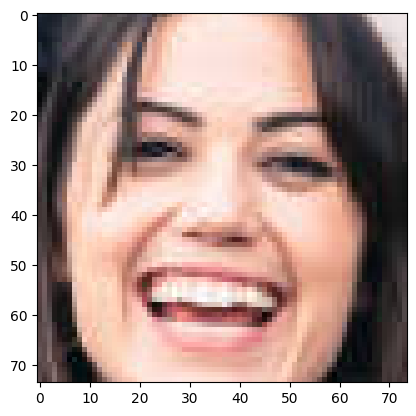

In [67]:
img_path = "Try\\istockphoto-1368965646-612x612.jpg"

img = cv.imread(img_path)
face_crop = img[y:y+h, x:x+w]

image_rgb = cv.cvtColor(face_crop, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [78]:
dfs = DeepFace.find(img_path = "Try\\istockphoto-1368965646-612x612.jpg", db_path = "Persons" , enforce_detection = True , batched=True ) #, threshold = 0.55

In [48]:


path = dfs[0][0]["identity"]

person_id = path.split("\\")[1]
person_id

'person_4'

In [51]:
dfs[0]

[{'hash': np.str_('3c88b9e12bd11e79dae313cf1c60d9e3e63e6ba8'),
  'target_y': np.int64(0),
  'target_h': np.int64(49),
  'identity': np.str_('Persons\\person_4\\face_0_1751876117_757.jpg'),
  'target_x': np.int64(0),
  'target_w': np.int64(37),
  'source_x': np.int64(323),
  'source_y': np.int64(130),
  'source_w': np.int64(74),
  'source_h': np.int64(74),
  'threshold': np.float64(0.68),
  'distance': np.float64(0.591676)},
 {'hash': np.str_('00d08a96551888ef904ccddb989244c1598bf137'),
  'target_y': np.int64(0),
  'target_h': np.int64(52),
  'identity': np.str_('Persons\\person_4\\face_0_1751876147_957.jpg'),
  'target_x': np.int64(0),
  'target_w': np.int64(38),
  'source_x': np.int64(323),
  'source_y': np.int64(130),
  'source_w': np.int64(74),
  'source_h': np.int64(74),
  'threshold': np.float64(0.68),
  'distance': np.float64(0.606518)},
 {'hash': np.str_('4cf68d875b1716e1010633da48425c9c3fab84cf'),
  'target_y': np.int64(0),
  'target_h': np.int64(47),
  'identity': np.str_('Per

In [ ]:
if dfs[0][0]["distance"] >= 0.55:
    print("waddy")

waddy


In [66]:
x= int(dfs[0][0]["source_x"])
x

for detected_person in dfs:
    if detected_person:
        print(detected_person)


[{'hash': np.str_('3c88b9e12bd11e79dae313cf1c60d9e3e63e6ba8'), 'target_y': np.int64(0), 'target_h': np.int64(49), 'identity': np.str_('Persons\\person_4\\face_0_1751876117_757.jpg'), 'target_x': np.int64(0), 'target_w': np.int64(37), 'source_x': np.int64(323), 'source_y': np.int64(130), 'source_w': np.int64(74), 'source_h': np.int64(74), 'threshold': np.float64(0.68), 'distance': np.float64(0.591676)}, {'hash': np.str_('00d08a96551888ef904ccddb989244c1598bf137'), 'target_y': np.int64(0), 'target_h': np.int64(52), 'identity': np.str_('Persons\\person_4\\face_0_1751876147_957.jpg'), 'target_x': np.int64(0), 'target_w': np.int64(38), 'source_x': np.int64(323), 'source_y': np.int64(130), 'source_w': np.int64(74), 'source_h': np.int64(74), 'threshold': np.float64(0.68), 'distance': np.float64(0.606518)}, {'hash': np.str_('4cf68d875b1716e1010633da48425c9c3fab84cf'), 'target_y': np.int64(0), 'target_h': np.int64(47), 'identity': np.str_('Persons\\person_4\\face_0_1751876096_635.jpg'), 'target

### Tries part of func for single face 

In [3]:
detection_model = DeepFace.build_model(model_name="mtcnn", task="face_detector")

In [38]:
results = DeepFace.extract_faces(
    img_path = "Try\\istockphoto-1368965646-612x612.jpg" ,
    detector_backend = "mtcnn",
    enforce_detection = False)

3/3 [==============================] - 0s 11ms/step


In [43]:
for idx in range(len(results)):
    x = results[idx] ["facial_area"]["x"]
    print(type(x))


<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


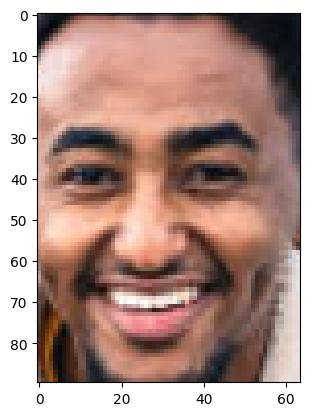

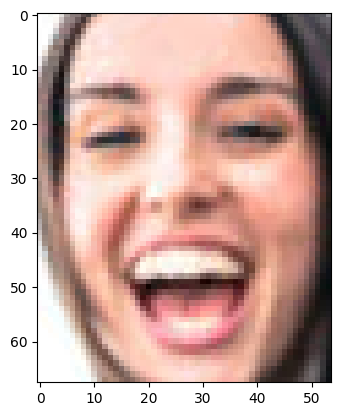

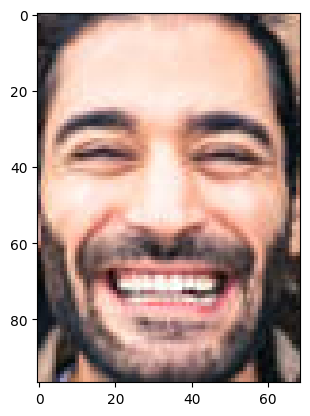

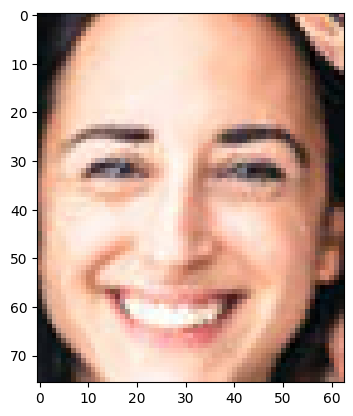

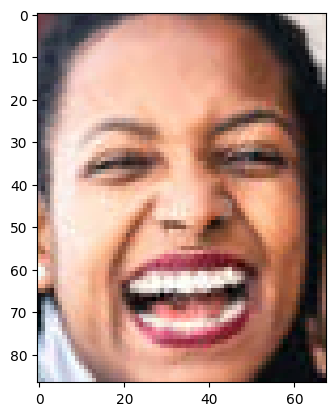

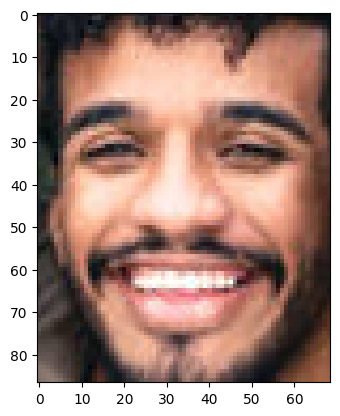

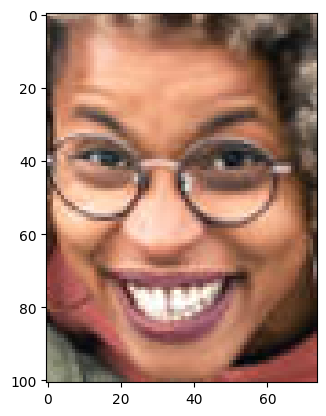

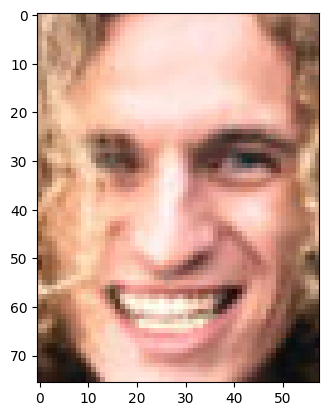

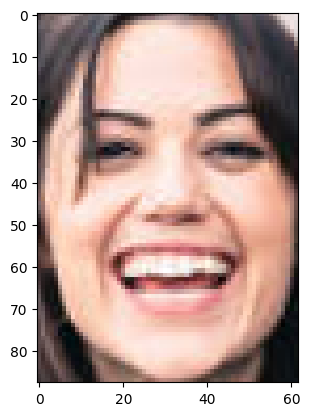

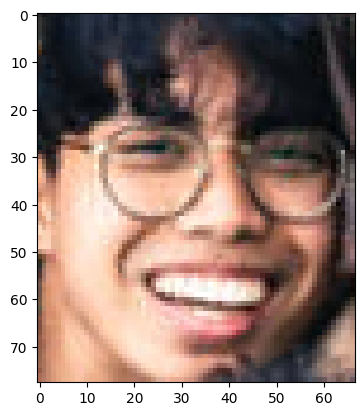

In [28]:
for i in range(len(dfs)):

    img = dfs[i]["face"]
    if dfs[i]["confidence"] >= 0.85:
        plt.imshow(img)
        plt.show()

### Plotting Images inside Persons Folder

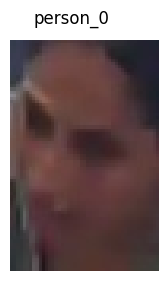

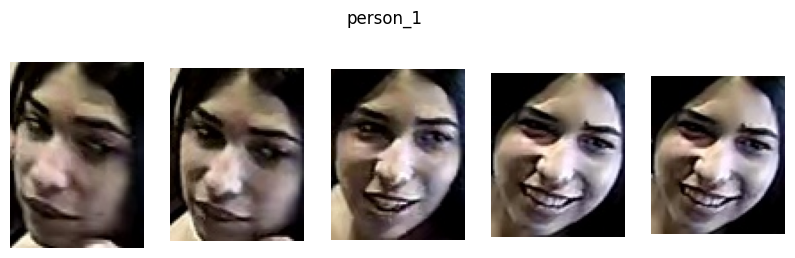

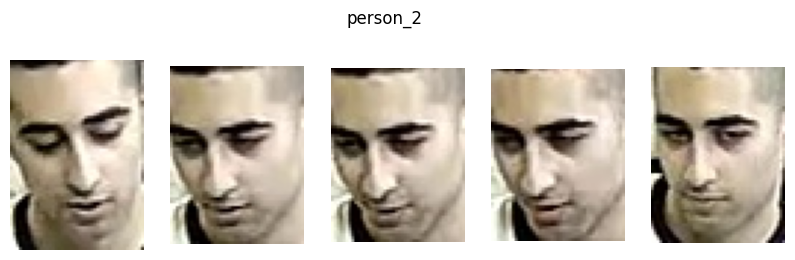

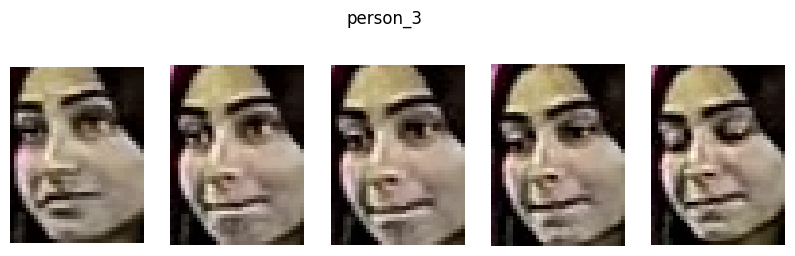

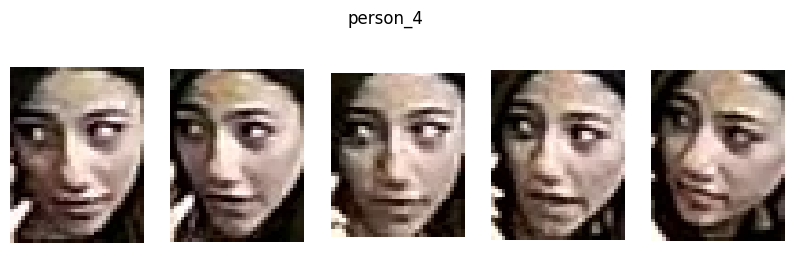

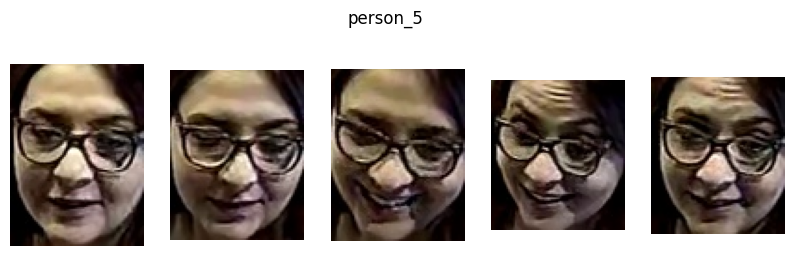

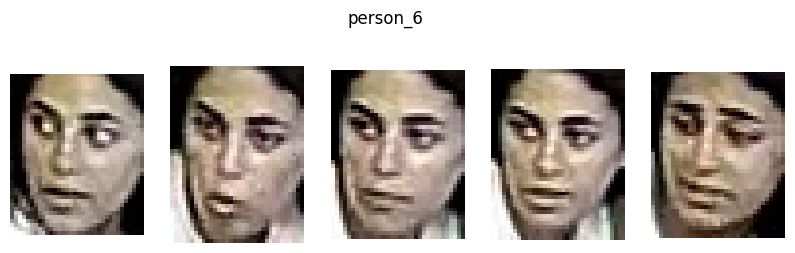

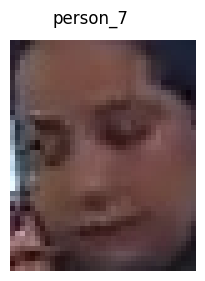

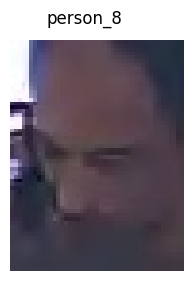

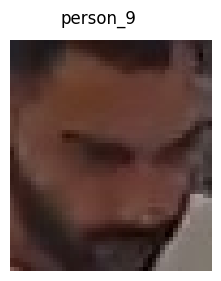

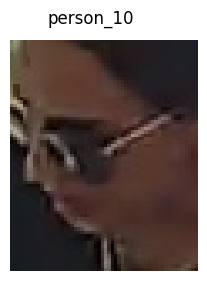

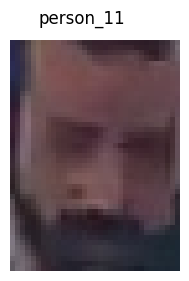

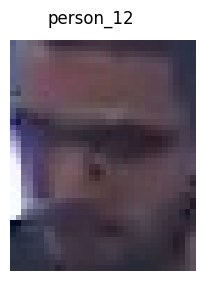

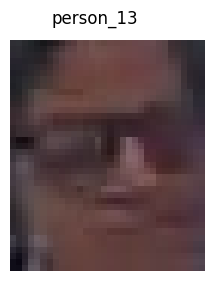

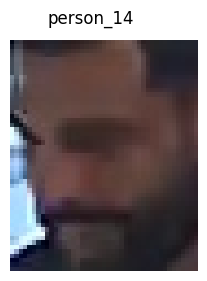

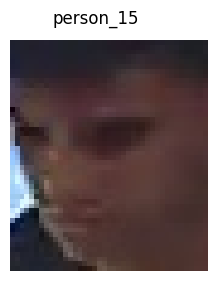

In [65]:
folder_path = "Persons_Faces"

person_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
person_folders.sort(key=lambda x: int(x.split('_')[1]))

for person in person_folders:
    images = glob.glob(os.path.join(folder_path, person, "*.jpg"))[:5]
    
    if images:
        fig, axes = plt.subplots(1, len(images), figsize=(10, 3))
        if len(images) == 1:
            axes = [axes]
        
        for i, img_path in enumerate(images):
            img = cv.imread(img_path)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            axes[i].imshow(img)
            axes[i].axis('off')
        
        plt.suptitle(person)
        plt.show()

### Saving Emotion Model 


In [39]:
import numpy as np 
import cv2 as cv
from PIL import Image
import pickle
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms

In [40]:
filename = 'C:\\Users\\Mohamed.ElSayed\\Desktop\\deep_face\\finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
emotions = ['happy', 'surprise', 'sad', 'anger', 'disgust', 'fear', 'neutral']

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [42]:
image = cv.imread("C:\\Users\\Mohamed.ElSayed\\Desktop\\deep_face\\Persons_Faces\\person_7\\face_0_1752582122_22.jpg") 
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
pil_img = Image.fromarray(gray_image)

img_tensor = transform(pil_img).unsqueeze(0).to(device)
with torch.no_grad():
    outputs = loaded_model(img_tensor)
    probabilities = F.softmax(outputs, dim=1)
scores = probabilities.cpu().numpy().flatten()
rounded_scores = [round(score, 2) for score in scores]
max_index = np.argmax(rounded_scores)
max_emotion = emotions[max_index]

In [47]:
max_index = np.argmax(rounded_scores)

### zooming in a frame .


In [48]:
from PIL import Image

def zoom_crop(img):
    """
    Zoom into a manually defined region in the image.

    Change the `start_x`, `start_y`, and `zoom_factor` variables
    below to control what part gets zoomed.
    """
    w, h = img.size

    # === 👇 EDIT THIS PART to control zoom location and level ===
    zoom_factor = 2  # 2 = zoom into 1/2 width and 1/2 height
    start_x = 250     # from 0 to w
    start_y = 50      # from 0 to h
    # === ^^^ ================================================ ===

    crop_w = w // zoom_factor
    crop_h = h // zoom_factor

    end_x = min(start_x + crop_w, w)
    end_y = min(start_y + crop_h, h)

    box = (start_x, start_y, end_x, end_y)
    cropped = img.crop(box)

    zoomed = cropped.resize((w, h), Image.LANCZOS)
    return zoomed


In [26]:
import cv2
from PIL import Image

def zoom_center(img, zoom_factor=2):
    w, h = img.size
    new_w = w // zoom_factor
    new_h = h // zoom_factor

    # Crop box: (left, upper, right, lower)
    left = (w - new_w) // 2
    upper = (h - new_h) // 2
    right = left + new_w
    lower = upper + new_h

    cropped = img.crop((left, upper, right, lower))
    zoomed = cropped.resize((w, h), Image.LANCZOS)
    return zoomed

def zoom_top_left(img):
    w, h = img.size
    box = (0, 0, w // 2, h // 2)  # (left, upper, right, lower)
    cropped = img.crop(box)
    zoomed = cropped.resize((w, h), Image.LANCZOS)
    return zoomed


# Paths to your two input images
img_path1 = "test.jpg"
img_path2 = "test 2k.jpg"

# Output paths
output1 = "output_image1.jpg"
output2 = "output_image2.jpg"

# Function to load, transform and save image
def process_and_save(image_path, output_path):
    # Read the image using OpenCV
    img_cv = cv2.imread(image_path)
    if img_cv is None:
        print(f"Failed to load image: {image_path}")
        return
    
    # Convert from BGR (OpenCV format) to RGB (PIL format)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    # Convert to PIL Image for manipulation
    img = Image.fromarray(img_rgb)

    # Resize the image (e.g., double its size)
    w, h = img.size
    img = zoom_crop(img)

    # Save it
    img.save(output_path)
    print(f"Saved: {output_path}")

# Process both images
process_and_save(img_path1, output1)
process_and_save(img_path2, output2)


Saved: output_image1.jpg
Saved: output_image2.jpg


### Trying Model

In [2]:
import numpy as np
import cv2 as cv
import os
import torch
import pickle
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from approach.ResEmoteNet import ResEmoteNet 

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
filename = 'D:\\Mohamed\\Desktop\\deep_face\\finalized_model.sav'
emotions = ['happy', 'sad' , 'neutral']

In [6]:
loaded_model = pickle.load(open(filename, 'rb'))

In [15]:
persons_dir = "Persons_Faces"


for person_folder in os.listdir(persons_dir):
        if not person_folder.startswith("person_"):
            continue
            
        person_path = os.path.join(persons_dir, person_folder)
        temp_path = os.path.join(person_path, "temp")
        
        if not os.path.exists(temp_path):
            continue
        
        # Get all face images from temp folder
        temp_faces = [f for f in os.listdir(temp_path) 
                     if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        if not temp_faces:
            continue
        
        person_emotions = []
        person_confidences = []
        face_emotion_map = {}  # Track emotion for each face
        
        # Process each face for emotion
        for face_file in temp_faces:
            face_path = os.path.join(temp_path, face_file)
            image = cv.imread(face_path)
            
            if image is not None:
                gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
                pil_img = Image.fromarray(gray_image)
                emotion_data = detect_emotion(pil_img)

                detected_emotion = emotion_data['detected_emotion']
                confidence = emotion_data['confidence_score']
                
                person_emotions.append(detected_emotion)
                person_confidences.append(confidence)
                face_emotion_map[face_file] = detected_emotion

In [17]:
face_emotion_map

{'face_0_1752658771_537.jpg': 'sad',
 'face_0_1752658781_538.jpg': 'sad',
 'face_0_1752658795_541.jpg': 'sad',
 'face_0_1752658804_542.jpg': 'sad',
 'face_0_1752658822_546.jpg': 'sad',
 'face_0_1752658879_558.jpg': 'sad',
 'face_0_1752658939_569.jpg': 'happy',
 'face_0_1752658960_573.jpg': 'sad',
 'face_0_1752658980_577.jpg': 'happy',
 'face_0_1752658989_578.jpg': 'happy',
 'face_0_1752658995_579.jpg': 'sad',
 'face_0_1752659000_581.jpg': 'happy',
 'face_0_1752659014_583.jpg': 'sad',
 'face_0_1752659033_586.jpg': 'happy',
 'face_0_1752659060_589.jpg': 'happy',
 'face_0_1752659075_592.jpg': 'happy',
 'face_0_1752659085_593.jpg': 'happy',
 'face_0_1752659112_597.jpg': 'happy',
 'face_0_1752659119_598.jpg': 'happy',
 'face_0_1752659136_601.jpg': 'happy',
 'face_0_1752659144_602.jpg': 'happy',
 'face_0_1752659158_604.jpg': 'sad',
 'face_0_1752659170_606.jpg': 'happy',
 'face_0_1752659176_607.jpg': 'happy',
 'face_0_1752659184_608.jpg': 'happy',
 'face_0_1752659193_609.jpg': 'happy',
 'face

In [15]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def detect_emotion(image):
    if image is not None:
        img_tensor = transform(image).unsqueeze(0).to(device)
        with torch.no_grad():
            outputs = loaded_model(img_tensor)
            probabilities = F.softmax(outputs, dim=1)
        scores = probabilities.cpu().numpy().flatten()
        rounded_scores = [round(score, 2) for score in scores]
        max_index = np.argmax(rounded_scores)
        max_emotion = emotions[max_index]
        return {
            'detected_emotion': max_emotion,
            'confidence_score': rounded_scores[max_index],
            'happy_prob': rounded_scores[0], 
            'sad_prob': rounded_scores[1],
            'neutral_prob': rounded_scores[2]
        }


{'detected_emotion': 'sad', 'confidence_score': 0.79, 'happy_prob': 0.01, 'sad_prob': 0.79, 'neutral_prob': 0.2}


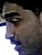

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.0, 'sad_prob': 0.92, 'neutral_prob': 0.07}


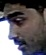

{'detected_emotion': 'sad', 'confidence_score': 0.85, 'happy_prob': 0.04, 'sad_prob': 0.85, 'neutral_prob': 0.11}


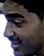

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.0, 'sad_prob': 0.9, 'neutral_prob': 0.1}


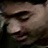

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.01}


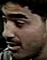

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.01, 'sad_prob': 0.97, 'neutral_prob': 0.02}


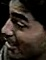

{'detected_emotion': 'happy', 'confidence_score': 0.95, 'happy_prob': 0.95, 'sad_prob': 0.04, 'neutral_prob': 0.01}


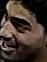

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.0, 'sad_prob': 0.96, 'neutral_prob': 0.03}


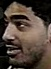

{'detected_emotion': 'sad', 'confidence_score': 0.89, 'happy_prob': 0.08, 'sad_prob': 0.89, 'neutral_prob': 0.04}


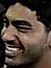

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


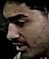

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.02, 'sad_prob': 0.97, 'neutral_prob': 0.01}


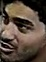

{'detected_emotion': 'sad', 'confidence_score': 0.78, 'happy_prob': 0.0, 'sad_prob': 0.78, 'neutral_prob': 0.22}


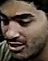

{'detected_emotion': 'happy', 'confidence_score': 0.71, 'happy_prob': 0.71, 'sad_prob': 0.22, 'neutral_prob': 0.07}


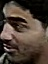

{'detected_emotion': 'sad', 'confidence_score': 0.93, 'happy_prob': 0.0, 'sad_prob': 0.93, 'neutral_prob': 0.07}


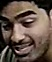

{'detected_emotion': 'sad', 'confidence_score': 0.94, 'happy_prob': 0.01, 'sad_prob': 0.94, 'neutral_prob': 0.04}


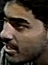

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.02}


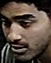

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


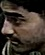

{'detected_emotion': 'sad', 'confidence_score': 0.77, 'happy_prob': 0.02, 'sad_prob': 0.77, 'neutral_prob': 0.22}


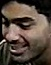

{'detected_emotion': 'sad', 'confidence_score': 0.6, 'happy_prob': 0.14, 'sad_prob': 0.6, 'neutral_prob': 0.26}


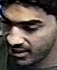

{'detected_emotion': 'happy', 'confidence_score': 0.47, 'happy_prob': 0.47, 'sad_prob': 0.33, 'neutral_prob': 0.19}


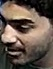

{'detected_emotion': 'happy', 'confidence_score': 0.59, 'happy_prob': 0.59, 'sad_prob': 0.01, 'neutral_prob': 0.4}


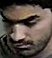

{'detected_emotion': 'neutral', 'confidence_score': 0.49, 'happy_prob': 0.13, 'sad_prob': 0.38, 'neutral_prob': 0.49}


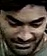

{'detected_emotion': 'sad', 'confidence_score': 0.89, 'happy_prob': 0.0, 'sad_prob': 0.89, 'neutral_prob': 0.1}


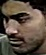

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.02}


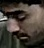

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


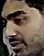

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.0, 'sad_prob': 0.97, 'neutral_prob': 0.03}


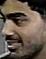

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


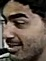

{'detected_emotion': 'neutral', 'confidence_score': 0.87, 'happy_prob': 0.08, 'sad_prob': 0.05, 'neutral_prob': 0.87}


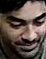

{'detected_emotion': 'sad', 'confidence_score': 1.0, 'happy_prob': 0.0, 'sad_prob': 1.0, 'neutral_prob': 0.0}


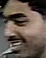

{'detected_emotion': 'happy', 'confidence_score': 0.53, 'happy_prob': 0.53, 'sad_prob': 0.35, 'neutral_prob': 0.12}


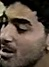

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.0, 'sad_prob': 0.97, 'neutral_prob': 0.03}


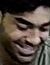

{'detected_emotion': 'neutral', 'confidence_score': 0.71, 'happy_prob': 0.11, 'sad_prob': 0.18, 'neutral_prob': 0.71}


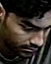

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


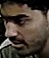

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


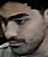

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.05, 'sad_prob': 0.9, 'neutral_prob': 0.05}


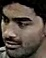

{'detected_emotion': 'sad', 'confidence_score': 0.84, 'happy_prob': 0.04, 'sad_prob': 0.84, 'neutral_prob': 0.12}


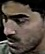

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.0, 'sad_prob': 0.86, 'neutral_prob': 0.13}


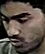

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.01, 'sad_prob': 0.87, 'neutral_prob': 0.12}


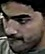

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.01}


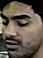

{'detected_emotion': 'sad', 'confidence_score': 0.88, 'happy_prob': 0.07, 'sad_prob': 0.88, 'neutral_prob': 0.05}


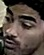

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.02}


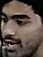

{'detected_emotion': 'sad', 'confidence_score': 0.82, 'happy_prob': 0.0, 'sad_prob': 0.82, 'neutral_prob': 0.18}


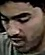

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.06, 'sad_prob': 0.87, 'neutral_prob': 0.07}


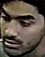

{'detected_emotion': 'happy', 'confidence_score': 0.4, 'happy_prob': 0.4, 'sad_prob': 0.22, 'neutral_prob': 0.37}


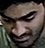

{'detected_emotion': 'sad', 'confidence_score': 0.78, 'happy_prob': 0.19, 'sad_prob': 0.78, 'neutral_prob': 0.04}


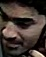

{'detected_emotion': 'sad', 'confidence_score': 0.67, 'happy_prob': 0.16, 'sad_prob': 0.67, 'neutral_prob': 0.16}


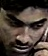

{'detected_emotion': 'happy', 'confidence_score': 0.86, 'happy_prob': 0.86, 'sad_prob': 0.13, 'neutral_prob': 0.01}


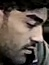

{'detected_emotion': 'sad', 'confidence_score': 0.61, 'happy_prob': 0.02, 'sad_prob': 0.61, 'neutral_prob': 0.38}


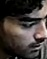

{'detected_emotion': 'sad', 'confidence_score': 0.72, 'happy_prob': 0.1, 'sad_prob': 0.72, 'neutral_prob': 0.18}


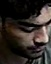

{'detected_emotion': 'happy', 'confidence_score': 0.62, 'happy_prob': 0.62, 'sad_prob': 0.2, 'neutral_prob': 0.18}


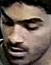

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.01}


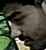

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.08, 'sad_prob': 0.9, 'neutral_prob': 0.01}


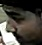

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.01, 'sad_prob': 0.92, 'neutral_prob': 0.07}


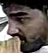

{'detected_emotion': 'sad', 'confidence_score': 0.94, 'happy_prob': 0.04, 'sad_prob': 0.94, 'neutral_prob': 0.02}


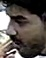

{'detected_emotion': 'sad', 'confidence_score': 1.0, 'happy_prob': 0.0, 'sad_prob': 1.0, 'neutral_prob': 0.0}


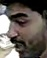

{'detected_emotion': 'happy', 'confidence_score': 0.97, 'happy_prob': 0.97, 'sad_prob': 0.03, 'neutral_prob': 0.0}


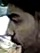

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.01, 'sad_prob': 0.99, 'neutral_prob': 0.01}


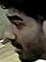

{'detected_emotion': 'sad', 'confidence_score': 0.55, 'happy_prob': 0.34, 'sad_prob': 0.55, 'neutral_prob': 0.11}


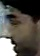

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.02, 'sad_prob': 0.96, 'neutral_prob': 0.02}


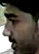

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.01, 'sad_prob': 0.97, 'neutral_prob': 0.02}


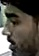

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.01, 'sad_prob': 0.97, 'neutral_prob': 0.02}


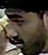

{'detected_emotion': 'sad', 'confidence_score': 1.0, 'happy_prob': 0.0, 'sad_prob': 1.0, 'neutral_prob': 0.0}


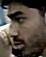

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.0}


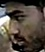

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.0}


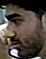

{'detected_emotion': 'sad', 'confidence_score': 0.6, 'happy_prob': 0.01, 'sad_prob': 0.6, 'neutral_prob': 0.39}


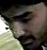

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.0, 'sad_prob': 0.95, 'neutral_prob': 0.05}


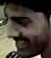

{'detected_emotion': 'sad', 'confidence_score': 0.76, 'happy_prob': 0.19, 'sad_prob': 0.76, 'neutral_prob': 0.04}


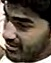

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.01, 'sad_prob': 0.92, 'neutral_prob': 0.07}


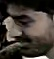

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


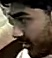

{'detected_emotion': 'sad', 'confidence_score': 0.76, 'happy_prob': 0.14, 'sad_prob': 0.76, 'neutral_prob': 0.1}


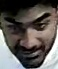

{'detected_emotion': 'sad', 'confidence_score': 0.78, 'happy_prob': 0.12, 'sad_prob': 0.78, 'neutral_prob': 0.1}


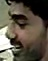

{'detected_emotion': 'sad', 'confidence_score': 0.7, 'happy_prob': 0.23, 'sad_prob': 0.7, 'neutral_prob': 0.07}


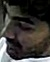

{'detected_emotion': 'sad', 'confidence_score': 0.94, 'happy_prob': 0.0, 'sad_prob': 0.94, 'neutral_prob': 0.06}


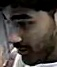

{'detected_emotion': 'sad', 'confidence_score': 0.62, 'happy_prob': 0.16, 'sad_prob': 0.62, 'neutral_prob': 0.21}


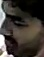

{'detected_emotion': 'happy', 'confidence_score': 0.51, 'happy_prob': 0.51, 'sad_prob': 0.45, 'neutral_prob': 0.04}


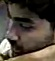

{'detected_emotion': 'sad', 'confidence_score': 0.79, 'happy_prob': 0.04, 'sad_prob': 0.79, 'neutral_prob': 0.17}


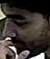

{'detected_emotion': 'sad', 'confidence_score': 0.74, 'happy_prob': 0.24, 'sad_prob': 0.74, 'neutral_prob': 0.02}


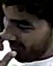

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


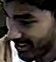

{'detected_emotion': 'happy', 'confidence_score': 0.66, 'happy_prob': 0.66, 'sad_prob': 0.32, 'neutral_prob': 0.02}


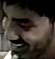

{'detected_emotion': 'happy', 'confidence_score': 0.49, 'happy_prob': 0.49, 'sad_prob': 0.43, 'neutral_prob': 0.08}


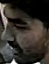

{'detected_emotion': 'sad', 'confidence_score': 0.8, 'happy_prob': 0.13, 'sad_prob': 0.8, 'neutral_prob': 0.07}


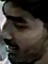

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.01, 'sad_prob': 0.86, 'neutral_prob': 0.13}


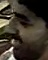

{'detected_emotion': 'sad', 'confidence_score': 0.91, 'happy_prob': 0.0, 'sad_prob': 0.91, 'neutral_prob': 0.09}


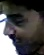

{'detected_emotion': 'sad', 'confidence_score': 0.67, 'happy_prob': 0.03, 'sad_prob': 0.67, 'neutral_prob': 0.3}


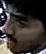

{'detected_emotion': 'sad', 'confidence_score': 0.69, 'happy_prob': 0.28, 'sad_prob': 0.69, 'neutral_prob': 0.03}


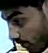

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.0, 'sad_prob': 0.92, 'neutral_prob': 0.08}


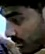

{'detected_emotion': 'sad', 'confidence_score': 0.57, 'happy_prob': 0.23, 'sad_prob': 0.57, 'neutral_prob': 0.19}


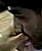

{'detected_emotion': 'neutral', 'confidence_score': 0.83, 'happy_prob': 0.0, 'sad_prob': 0.17, 'neutral_prob': 0.83}


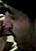

{'detected_emotion': 'neutral', 'confidence_score': 0.45, 'happy_prob': 0.14, 'sad_prob': 0.4, 'neutral_prob': 0.45}


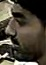

{'detected_emotion': 'neutral', 'confidence_score': 0.83, 'happy_prob': 0.01, 'sad_prob': 0.16, 'neutral_prob': 0.83}


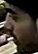

{'detected_emotion': 'sad', 'confidence_score': 0.93, 'happy_prob': 0.03, 'sad_prob': 0.93, 'neutral_prob': 0.04}


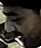

{'detected_emotion': 'sad', 'confidence_score': 0.78, 'happy_prob': 0.01, 'sad_prob': 0.78, 'neutral_prob': 0.22}


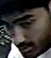

{'detected_emotion': 'happy', 'confidence_score': 1.0, 'happy_prob': 1.0, 'sad_prob': 0.0, 'neutral_prob': 0.0}


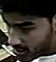

{'detected_emotion': 'neutral', 'confidence_score': 0.74, 'happy_prob': 0.16, 'sad_prob': 0.1, 'neutral_prob': 0.74}


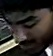

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.04, 'sad_prob': 0.87, 'neutral_prob': 0.09}


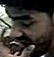

{'detected_emotion': 'sad', 'confidence_score': 0.83, 'happy_prob': 0.02, 'sad_prob': 0.83, 'neutral_prob': 0.15}


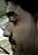

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.25, 'sad_prob': 0.73, 'neutral_prob': 0.02}


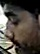

{'detected_emotion': 'sad', 'confidence_score': 0.89, 'happy_prob': 0.07, 'sad_prob': 0.89, 'neutral_prob': 0.05}


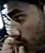

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.01, 'sad_prob': 0.99, 'neutral_prob': 0.01}


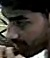

{'detected_emotion': 'happy', 'confidence_score': 0.55, 'happy_prob': 0.55, 'sad_prob': 0.44, 'neutral_prob': 0.01}


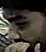

{'detected_emotion': 'sad', 'confidence_score': 0.75, 'happy_prob': 0.02, 'sad_prob': 0.75, 'neutral_prob': 0.23}


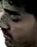

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.03, 'sad_prob': 0.92, 'neutral_prob': 0.06}


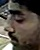

{'detected_emotion': 'sad', 'confidence_score': 0.63, 'happy_prob': 0.04, 'sad_prob': 0.63, 'neutral_prob': 0.33}


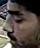

{'detected_emotion': 'happy', 'confidence_score': 0.61, 'happy_prob': 0.61, 'sad_prob': 0.35, 'neutral_prob': 0.04}


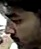

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.0, 'sad_prob': 0.97, 'neutral_prob': 0.02}


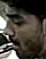

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.02}


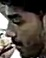

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.01, 'sad_prob': 0.87, 'neutral_prob': 0.12}


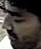

{'detected_emotion': 'sad', 'confidence_score': 0.59, 'happy_prob': 0.13, 'sad_prob': 0.59, 'neutral_prob': 0.27}


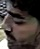

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.01, 'sad_prob': 0.73, 'neutral_prob': 0.26}


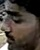

{'detected_emotion': 'sad', 'confidence_score': 0.81, 'happy_prob': 0.01, 'sad_prob': 0.81, 'neutral_prob': 0.18}


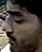

{'detected_emotion': 'sad', 'confidence_score': 0.56, 'happy_prob': 0.36, 'sad_prob': 0.56, 'neutral_prob': 0.08}


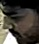

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.01, 'sad_prob': 0.87, 'neutral_prob': 0.12}


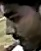

{'detected_emotion': 'sad', 'confidence_score': 0.76, 'happy_prob': 0.06, 'sad_prob': 0.76, 'neutral_prob': 0.18}


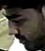

{'detected_emotion': 'neutral', 'confidence_score': 0.63, 'happy_prob': 0.01, 'sad_prob': 0.36, 'neutral_prob': 0.63}


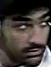

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.01, 'sad_prob': 0.97, 'neutral_prob': 0.02}


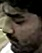

{'detected_emotion': 'sad', 'confidence_score': 0.81, 'happy_prob': 0.0, 'sad_prob': 0.81, 'neutral_prob': 0.19}


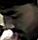

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.07, 'sad_prob': 0.87, 'neutral_prob': 0.06}


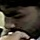

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.01, 'sad_prob': 0.95, 'neutral_prob': 0.04}


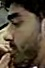

{'detected_emotion': 'neutral', 'confidence_score': 0.7, 'happy_prob': 0.16, 'sad_prob': 0.14, 'neutral_prob': 0.7}


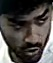

{'detected_emotion': 'sad', 'confidence_score': 0.68, 'happy_prob': 0.05, 'sad_prob': 0.68, 'neutral_prob': 0.27}


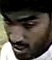

{'detected_emotion': 'neutral', 'confidence_score': 0.5, 'happy_prob': 0.05, 'sad_prob': 0.44, 'neutral_prob': 0.5}


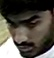

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.0, 'sad_prob': 0.96, 'neutral_prob': 0.04}


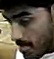

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.01, 'sad_prob': 0.96, 'neutral_prob': 0.04}


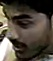

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.05, 'sad_prob': 0.9, 'neutral_prob': 0.05}


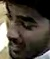

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.01}


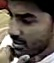

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.02, 'sad_prob': 0.96, 'neutral_prob': 0.02}


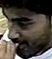

{'detected_emotion': 'sad', 'confidence_score': 0.67, 'happy_prob': 0.03, 'sad_prob': 0.67, 'neutral_prob': 0.3}


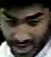

{'detected_emotion': 'happy', 'confidence_score': 0.79, 'happy_prob': 0.79, 'sad_prob': 0.17, 'neutral_prob': 0.04}


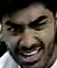

{'detected_emotion': 'sad', 'confidence_score': 0.91, 'happy_prob': 0.0, 'sad_prob': 0.91, 'neutral_prob': 0.09}


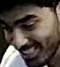

{'detected_emotion': 'sad', 'confidence_score': 0.91, 'happy_prob': 0.01, 'sad_prob': 0.91, 'neutral_prob': 0.08}


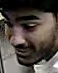

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.0, 'sad_prob': 0.95, 'neutral_prob': 0.05}


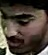

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.12, 'sad_prob': 0.73, 'neutral_prob': 0.15}


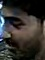

{'detected_emotion': 'neutral', 'confidence_score': 0.71, 'happy_prob': 0.03, 'sad_prob': 0.25, 'neutral_prob': 0.71}


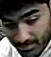

{'detected_emotion': 'happy', 'confidence_score': 0.74, 'happy_prob': 0.74, 'sad_prob': 0.23, 'neutral_prob': 0.02}


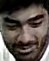

{'detected_emotion': 'sad', 'confidence_score': 0.57, 'happy_prob': 0.07, 'sad_prob': 0.57, 'neutral_prob': 0.35}


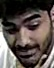

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.01, 'sad_prob': 0.92, 'neutral_prob': 0.07}


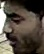

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.0, 'sad_prob': 0.96, 'neutral_prob': 0.03}


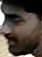

{'detected_emotion': 'sad', 'confidence_score': 0.93, 'happy_prob': 0.01, 'sad_prob': 0.93, 'neutral_prob': 0.06}


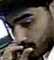

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.01, 'sad_prob': 0.96, 'neutral_prob': 0.03}


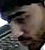

{'detected_emotion': 'sad', 'confidence_score': 0.84, 'happy_prob': 0.06, 'sad_prob': 0.84, 'neutral_prob': 0.09}


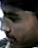

{'detected_emotion': 'happy', 'confidence_score': 0.5, 'happy_prob': 0.5, 'sad_prob': 0.17, 'neutral_prob': 0.33}


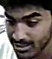

{'detected_emotion': 'sad', 'confidence_score': 0.75, 'happy_prob': 0.19, 'sad_prob': 0.75, 'neutral_prob': 0.06}


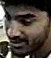

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.02, 'sad_prob': 0.96, 'neutral_prob': 0.02}


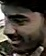

{'detected_emotion': 'happy', 'confidence_score': 0.61, 'happy_prob': 0.61, 'sad_prob': 0.12, 'neutral_prob': 0.27}


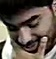

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.07, 'sad_prob': 0.9, 'neutral_prob': 0.03}


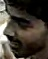

{'detected_emotion': 'sad', 'confidence_score': 0.81, 'happy_prob': 0.01, 'sad_prob': 0.81, 'neutral_prob': 0.18}


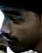

{'detected_emotion': 'happy', 'confidence_score': 0.76, 'happy_prob': 0.76, 'sad_prob': 0.19, 'neutral_prob': 0.05}


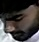

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


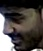

{'detected_emotion': 'neutral', 'confidence_score': 0.5, 'happy_prob': 0.01, 'sad_prob': 0.49, 'neutral_prob': 0.5}


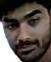

{'detected_emotion': 'neutral', 'confidence_score': 0.73, 'happy_prob': 0.08, 'sad_prob': 0.19, 'neutral_prob': 0.73}


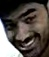

{'detected_emotion': 'neutral', 'confidence_score': 0.85, 'happy_prob': 0.14, 'sad_prob': 0.01, 'neutral_prob': 0.85}


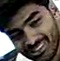

{'detected_emotion': 'neutral', 'confidence_score': 0.41, 'happy_prob': 0.37, 'sad_prob': 0.21, 'neutral_prob': 0.41}


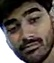

{'detected_emotion': 'happy', 'confidence_score': 0.47, 'happy_prob': 0.47, 'sad_prob': 0.37, 'neutral_prob': 0.15}


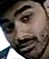

{'detected_emotion': 'sad', 'confidence_score': 1.0, 'happy_prob': 0.0, 'sad_prob': 1.0, 'neutral_prob': 0.0}


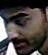

{'detected_emotion': 'sad', 'confidence_score': 0.62, 'happy_prob': 0.06, 'sad_prob': 0.62, 'neutral_prob': 0.32}


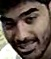

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


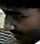

{'detected_emotion': 'neutral', 'confidence_score': 0.78, 'happy_prob': 0.13, 'sad_prob': 0.09, 'neutral_prob': 0.78}


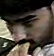

{'detected_emotion': 'sad', 'confidence_score': 0.8, 'happy_prob': 0.08, 'sad_prob': 0.8, 'neutral_prob': 0.12}


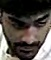

{'detected_emotion': 'sad', 'confidence_score': 0.62, 'happy_prob': 0.35, 'sad_prob': 0.62, 'neutral_prob': 0.03}


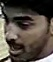

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.01}


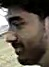

{'detected_emotion': 'neutral', 'confidence_score': 0.93, 'happy_prob': 0.05, 'sad_prob': 0.02, 'neutral_prob': 0.93}


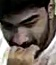

{'detected_emotion': 'sad', 'confidence_score': 0.72, 'happy_prob': 0.0, 'sad_prob': 0.72, 'neutral_prob': 0.28}


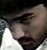

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.04, 'sad_prob': 0.87, 'neutral_prob': 0.09}


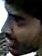

{'detected_emotion': 'happy', 'confidence_score': 0.94, 'happy_prob': 0.94, 'sad_prob': 0.05, 'neutral_prob': 0.01}


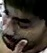

{'detected_emotion': 'neutral', 'confidence_score': 0.79, 'happy_prob': 0.03, 'sad_prob': 0.18, 'neutral_prob': 0.79}


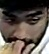

{'detected_emotion': 'sad', 'confidence_score': 0.69, 'happy_prob': 0.23, 'sad_prob': 0.69, 'neutral_prob': 0.08}


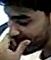

{'detected_emotion': 'sad', 'confidence_score': 0.93, 'happy_prob': 0.01, 'sad_prob': 0.93, 'neutral_prob': 0.06}


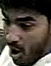

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.0, 'sad_prob': 0.96, 'neutral_prob': 0.03}


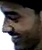

{'detected_emotion': 'neutral', 'confidence_score': 0.61, 'happy_prob': 0.09, 'sad_prob': 0.3, 'neutral_prob': 0.61}


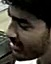

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.04, 'sad_prob': 0.73, 'neutral_prob': 0.22}


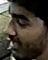

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.25, 'sad_prob': 0.73, 'neutral_prob': 0.02}


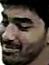

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.02, 'sad_prob': 0.95, 'neutral_prob': 0.03}


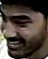

{'detected_emotion': 'happy', 'confidence_score': 0.54, 'happy_prob': 0.54, 'sad_prob': 0.35, 'neutral_prob': 0.11}


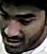

{'detected_emotion': 'happy', 'confidence_score': 0.87, 'happy_prob': 0.87, 'sad_prob': 0.1, 'neutral_prob': 0.03}


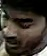

{'detected_emotion': 'sad', 'confidence_score': 0.79, 'happy_prob': 0.08, 'sad_prob': 0.79, 'neutral_prob': 0.12}


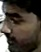

{'detected_emotion': 'sad', 'confidence_score': 0.91, 'happy_prob': 0.03, 'sad_prob': 0.91, 'neutral_prob': 0.06}


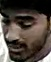

{'detected_emotion': 'sad', 'confidence_score': 0.81, 'happy_prob': 0.02, 'sad_prob': 0.81, 'neutral_prob': 0.16}


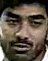

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.09, 'sad_prob': 0.86, 'neutral_prob': 0.05}


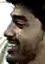

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.02}


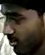

{'detected_emotion': 'sad', 'confidence_score': 0.88, 'happy_prob': 0.02, 'sad_prob': 0.88, 'neutral_prob': 0.09}


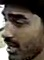

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.0, 'sad_prob': 0.95, 'neutral_prob': 0.05}


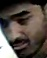

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.04, 'sad_prob': 0.92, 'neutral_prob': 0.04}


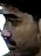

{'detected_emotion': 'sad', 'confidence_score': 0.58, 'happy_prob': 0.34, 'sad_prob': 0.58, 'neutral_prob': 0.08}


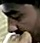

{'detected_emotion': 'sad', 'confidence_score': 0.91, 'happy_prob': 0.01, 'sad_prob': 0.91, 'neutral_prob': 0.08}


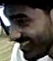

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.01, 'sad_prob': 0.86, 'neutral_prob': 0.14}


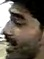

{'detected_emotion': 'sad', 'confidence_score': 0.53, 'happy_prob': 0.01, 'sad_prob': 0.53, 'neutral_prob': 0.45}


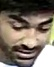

{'detected_emotion': 'sad', 'confidence_score': 0.57, 'happy_prob': 0.1, 'sad_prob': 0.57, 'neutral_prob': 0.32}


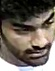

{'detected_emotion': 'sad', 'confidence_score': 0.81, 'happy_prob': 0.14, 'sad_prob': 0.81, 'neutral_prob': 0.05}


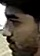

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.0}


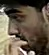

{'detected_emotion': 'sad', 'confidence_score': 0.78, 'happy_prob': 0.02, 'sad_prob': 0.78, 'neutral_prob': 0.2}


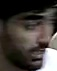

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.06, 'sad_prob': 0.92, 'neutral_prob': 0.02}


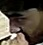

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.0, 'sad_prob': 0.96, 'neutral_prob': 0.03}


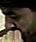

{'detected_emotion': 'sad', 'confidence_score': 0.62, 'happy_prob': 0.31, 'sad_prob': 0.62, 'neutral_prob': 0.08}


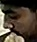

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.0, 'sad_prob': 0.95, 'neutral_prob': 0.05}


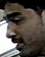

{'detected_emotion': 'happy', 'confidence_score': 0.83, 'happy_prob': 0.83, 'sad_prob': 0.15, 'neutral_prob': 0.02}


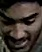

{'detected_emotion': 'happy', 'confidence_score': 0.85, 'happy_prob': 0.85, 'sad_prob': 0.06, 'neutral_prob': 0.09}


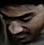

{'detected_emotion': 'sad', 'confidence_score': 0.81, 'happy_prob': 0.09, 'sad_prob': 0.81, 'neutral_prob': 0.1}


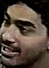

{'detected_emotion': 'happy', 'confidence_score': 0.95, 'happy_prob': 0.95, 'sad_prob': 0.01, 'neutral_prob': 0.04}


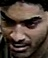

{'detected_emotion': 'happy', 'confidence_score': 0.82, 'happy_prob': 0.82, 'sad_prob': 0.02, 'neutral_prob': 0.16}


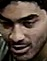

{'detected_emotion': 'happy', 'confidence_score': 0.51, 'happy_prob': 0.51, 'sad_prob': 0.45, 'neutral_prob': 0.04}


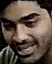

{'detected_emotion': 'neutral', 'confidence_score': 0.51, 'happy_prob': 0.01, 'sad_prob': 0.48, 'neutral_prob': 0.51}


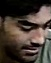

{'detected_emotion': 'neutral', 'confidence_score': 0.7, 'happy_prob': 0.09, 'sad_prob': 0.21, 'neutral_prob': 0.7}


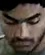

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.02, 'sad_prob': 0.96, 'neutral_prob': 0.02}


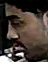

{'detected_emotion': 'happy', 'confidence_score': 0.55, 'happy_prob': 0.55, 'sad_prob': 0.04, 'neutral_prob': 0.41}


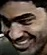

{'detected_emotion': 'sad', 'confidence_score': 0.88, 'happy_prob': 0.01, 'sad_prob': 0.88, 'neutral_prob': 0.1}


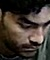

{'detected_emotion': 'sad', 'confidence_score': 0.89, 'happy_prob': 0.0, 'sad_prob': 0.89, 'neutral_prob': 0.11}


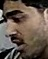

{'detected_emotion': 'sad', 'confidence_score': 0.48, 'happy_prob': 0.15, 'sad_prob': 0.48, 'neutral_prob': 0.36}


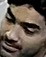

{'detected_emotion': 'sad', 'confidence_score': 0.54, 'happy_prob': 0.01, 'sad_prob': 0.54, 'neutral_prob': 0.44}


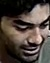

{'detected_emotion': 'sad', 'confidence_score': 0.63, 'happy_prob': 0.12, 'sad_prob': 0.63, 'neutral_prob': 0.24}


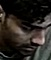

{'detected_emotion': 'sad', 'confidence_score': 0.55, 'happy_prob': 0.05, 'sad_prob': 0.55, 'neutral_prob': 0.4}


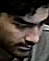

{'detected_emotion': 'sad', 'confidence_score': 0.76, 'happy_prob': 0.13, 'sad_prob': 0.76, 'neutral_prob': 0.11}


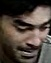

{'detected_emotion': 'sad', 'confidence_score': 0.53, 'happy_prob': 0.04, 'sad_prob': 0.53, 'neutral_prob': 0.42}


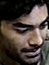

{'detected_emotion': 'sad', 'confidence_score': 0.55, 'happy_prob': 0.32, 'sad_prob': 0.55, 'neutral_prob': 0.13}


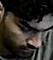

{'detected_emotion': 'sad', 'confidence_score': 0.79, 'happy_prob': 0.03, 'sad_prob': 0.79, 'neutral_prob': 0.18}


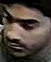

{'detected_emotion': 'happy', 'confidence_score': 0.75, 'happy_prob': 0.75, 'sad_prob': 0.12, 'neutral_prob': 0.13}


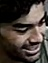

{'detected_emotion': 'happy', 'confidence_score': 0.6, 'happy_prob': 0.6, 'sad_prob': 0.2, 'neutral_prob': 0.19}


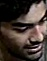

{'detected_emotion': 'happy', 'confidence_score': 0.71, 'happy_prob': 0.71, 'sad_prob': 0.13, 'neutral_prob': 0.16}


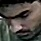

{'detected_emotion': 'happy', 'confidence_score': 1.0, 'happy_prob': 1.0, 'sad_prob': 0.0, 'neutral_prob': 0.0}


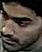

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.0, 'sad_prob': 0.95, 'neutral_prob': 0.05}


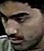

{'detected_emotion': 'happy', 'confidence_score': 0.76, 'happy_prob': 0.76, 'sad_prob': 0.12, 'neutral_prob': 0.11}


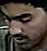

{'detected_emotion': 'sad', 'confidence_score': 0.85, 'happy_prob': 0.01, 'sad_prob': 0.85, 'neutral_prob': 0.14}


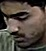

{'detected_emotion': 'sad', 'confidence_score': 0.63, 'happy_prob': 0.06, 'sad_prob': 0.63, 'neutral_prob': 0.3}


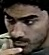

{'detected_emotion': 'happy', 'confidence_score': 0.99, 'happy_prob': 0.99, 'sad_prob': 0.0, 'neutral_prob': 0.0}


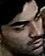

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.0, 'sad_prob': 0.87, 'neutral_prob': 0.13}


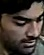

{'detected_emotion': 'happy', 'confidence_score': 0.54, 'happy_prob': 0.54, 'sad_prob': 0.43, 'neutral_prob': 0.03}


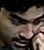

{'detected_emotion': 'happy', 'confidence_score': 0.39, 'happy_prob': 0.39, 'sad_prob': 0.29, 'neutral_prob': 0.3}


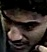

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


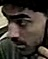

{'detected_emotion': 'sad', 'confidence_score': 0.89, 'happy_prob': 0.01, 'sad_prob': 0.89, 'neutral_prob': 0.09}


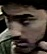

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.02, 'sad_prob': 0.73, 'neutral_prob': 0.25}


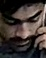

{'detected_emotion': 'sad', 'confidence_score': 0.5, 'happy_prob': 0.2, 'sad_prob': 0.5, 'neutral_prob': 0.29}


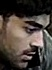

{'detected_emotion': 'neutral', 'confidence_score': 0.68, 'happy_prob': 0.24, 'sad_prob': 0.07, 'neutral_prob': 0.68}


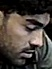

{'detected_emotion': 'sad', 'confidence_score': 0.77, 'happy_prob': 0.01, 'sad_prob': 0.77, 'neutral_prob': 0.21}


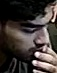

{'detected_emotion': 'sad', 'confidence_score': 0.66, 'happy_prob': 0.02, 'sad_prob': 0.66, 'neutral_prob': 0.32}


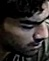

{'detected_emotion': 'sad', 'confidence_score': 0.52, 'happy_prob': 0.35, 'sad_prob': 0.52, 'neutral_prob': 0.12}


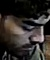

{'detected_emotion': 'neutral', 'confidence_score': 0.5, 'happy_prob': 0.01, 'sad_prob': 0.49, 'neutral_prob': 0.5}


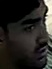

{'detected_emotion': 'sad', 'confidence_score': 0.93, 'happy_prob': 0.01, 'sad_prob': 0.93, 'neutral_prob': 0.05}


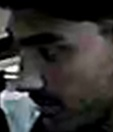

{'detected_emotion': 'sad', 'confidence_score': 0.8, 'happy_prob': 0.07, 'sad_prob': 0.8, 'neutral_prob': 0.12}


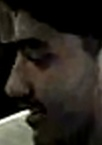

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.01, 'sad_prob': 0.96, 'neutral_prob': 0.03}


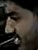

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.0, 'sad_prob': 0.86, 'neutral_prob': 0.14}


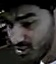

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.01}


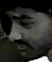

{'detected_emotion': 'sad', 'confidence_score': 0.78, 'happy_prob': 0.18, 'sad_prob': 0.78, 'neutral_prob': 0.04}


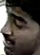

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.05, 'sad_prob': 0.95, 'neutral_prob': 0.0}


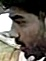

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.01, 'sad_prob': 0.87, 'neutral_prob': 0.12}


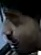

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.01}


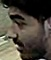

{'detected_emotion': 'sad', 'confidence_score': 0.85, 'happy_prob': 0.1, 'sad_prob': 0.85, 'neutral_prob': 0.05}


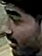

{'detected_emotion': 'sad', 'confidence_score': 0.62, 'happy_prob': 0.27, 'sad_prob': 0.62, 'neutral_prob': 0.11}


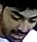

{'detected_emotion': 'neutral', 'confidence_score': 0.72, 'happy_prob': 0.06, 'sad_prob': 0.22, 'neutral_prob': 0.72}


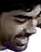

{'detected_emotion': 'sad', 'confidence_score': 0.8, 'happy_prob': 0.05, 'sad_prob': 0.8, 'neutral_prob': 0.15}


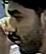

{'detected_emotion': 'sad', 'confidence_score': 1.0, 'happy_prob': 0.0, 'sad_prob': 1.0, 'neutral_prob': 0.0}


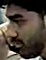

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.06, 'sad_prob': 0.92, 'neutral_prob': 0.02}


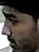

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.01}


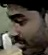

{'detected_emotion': 'sad', 'confidence_score': 0.42, 'happy_prob': 0.37, 'sad_prob': 0.42, 'neutral_prob': 0.19}


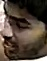

{'detected_emotion': 'happy', 'confidence_score': 0.53, 'happy_prob': 0.53, 'sad_prob': 0.44, 'neutral_prob': 0.03}


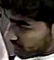

{'detected_emotion': 'sad', 'confidence_score': 0.88, 'happy_prob': 0.09, 'sad_prob': 0.88, 'neutral_prob': 0.02}


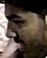

{'detected_emotion': 'sad', 'confidence_score': 0.81, 'happy_prob': 0.02, 'sad_prob': 0.81, 'neutral_prob': 0.18}


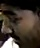

{'detected_emotion': 'sad', 'confidence_score': 0.77, 'happy_prob': 0.14, 'sad_prob': 0.77, 'neutral_prob': 0.09}


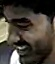

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.01}


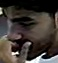

{'detected_emotion': 'neutral', 'confidence_score': 0.62, 'happy_prob': 0.14, 'sad_prob': 0.23, 'neutral_prob': 0.62}


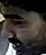

{'detected_emotion': 'sad', 'confidence_score': 0.66, 'happy_prob': 0.01, 'sad_prob': 0.66, 'neutral_prob': 0.33}


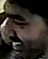

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


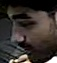

{'detected_emotion': 'happy', 'confidence_score': 0.85, 'happy_prob': 0.85, 'sad_prob': 0.14, 'neutral_prob': 0.01}


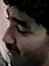

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.01}


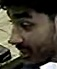

{'detected_emotion': 'sad', 'confidence_score': 0.93, 'happy_prob': 0.0, 'sad_prob': 0.93, 'neutral_prob': 0.06}


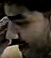

{'detected_emotion': 'sad', 'confidence_score': 0.83, 'happy_prob': 0.04, 'sad_prob': 0.83, 'neutral_prob': 0.13}


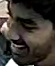

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.01, 'sad_prob': 0.9, 'neutral_prob': 0.09}


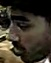

{'detected_emotion': 'sad', 'confidence_score': 0.89, 'happy_prob': 0.04, 'sad_prob': 0.89, 'neutral_prob': 0.07}


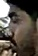

{'detected_emotion': 'sad', 'confidence_score': 0.88, 'happy_prob': 0.08, 'sad_prob': 0.88, 'neutral_prob': 0.04}


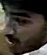

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.02, 'sad_prob': 0.92, 'neutral_prob': 0.06}


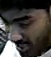

{'detected_emotion': 'sad', 'confidence_score': 0.8, 'happy_prob': 0.03, 'sad_prob': 0.8, 'neutral_prob': 0.18}


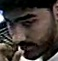

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.03, 'sad_prob': 0.86, 'neutral_prob': 0.11}


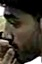

{'detected_emotion': 'sad', 'confidence_score': 0.82, 'happy_prob': 0.06, 'sad_prob': 0.82, 'neutral_prob': 0.12}


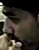

{'detected_emotion': 'sad', 'confidence_score': 0.72, 'happy_prob': 0.2, 'sad_prob': 0.72, 'neutral_prob': 0.07}


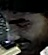

{'detected_emotion': 'neutral', 'confidence_score': 0.72, 'happy_prob': 0.23, 'sad_prob': 0.05, 'neutral_prob': 0.72}


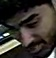

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.02}


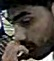

{'detected_emotion': 'neutral', 'confidence_score': 0.69, 'happy_prob': 0.27, 'sad_prob': 0.04, 'neutral_prob': 0.69}


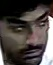

{'detected_emotion': 'sad', 'confidence_score': 0.84, 'happy_prob': 0.15, 'sad_prob': 0.84, 'neutral_prob': 0.01}


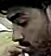

{'detected_emotion': 'sad', 'confidence_score': 0.85, 'happy_prob': 0.01, 'sad_prob': 0.85, 'neutral_prob': 0.14}


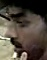

{'detected_emotion': 'sad', 'confidence_score': 0.85, 'happy_prob': 0.14, 'sad_prob': 0.85, 'neutral_prob': 0.01}


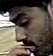

{'detected_emotion': 'sad', 'confidence_score': 0.79, 'happy_prob': 0.07, 'sad_prob': 0.79, 'neutral_prob': 0.14}


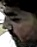

{'detected_emotion': 'sad', 'confidence_score': 0.71, 'happy_prob': 0.03, 'sad_prob': 0.71, 'neutral_prob': 0.26}


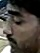

{'detected_emotion': 'happy', 'confidence_score': 0.59, 'happy_prob': 0.59, 'sad_prob': 0.37, 'neutral_prob': 0.04}


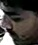

{'detected_emotion': 'sad', 'confidence_score': 0.8, 'happy_prob': 0.09, 'sad_prob': 0.8, 'neutral_prob': 0.12}


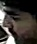

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.01}


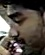

{'detected_emotion': 'sad', 'confidence_score': 0.94, 'happy_prob': 0.04, 'sad_prob': 0.94, 'neutral_prob': 0.02}


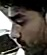

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.02, 'sad_prob': 0.86, 'neutral_prob': 0.12}


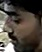

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.01, 'sad_prob': 0.98, 'neutral_prob': 0.01}


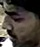

{'detected_emotion': 'sad', 'confidence_score': 0.91, 'happy_prob': 0.05, 'sad_prob': 0.91, 'neutral_prob': 0.04}


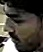

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.04, 'sad_prob': 0.73, 'neutral_prob': 0.22}


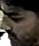

{'detected_emotion': 'sad', 'confidence_score': 0.6, 'happy_prob': 0.34, 'sad_prob': 0.6, 'neutral_prob': 0.06}


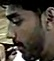

{'detected_emotion': 'sad', 'confidence_score': 0.49, 'happy_prob': 0.45, 'sad_prob': 0.49, 'neutral_prob': 0.06}


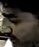

{'detected_emotion': 'sad', 'confidence_score': 0.69, 'happy_prob': 0.23, 'sad_prob': 0.69, 'neutral_prob': 0.07}


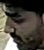

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.02, 'sad_prob': 0.9, 'neutral_prob': 0.08}


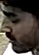

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.09, 'sad_prob': 0.86, 'neutral_prob': 0.05}


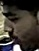

{'detected_emotion': 'sad', 'confidence_score': 0.91, 'happy_prob': 0.01, 'sad_prob': 0.91, 'neutral_prob': 0.08}


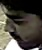

{'detected_emotion': 'sad', 'confidence_score': 0.83, 'happy_prob': 0.0, 'sad_prob': 0.83, 'neutral_prob': 0.16}


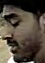

{'detected_emotion': 'sad', 'confidence_score': 0.76, 'happy_prob': 0.11, 'sad_prob': 0.76, 'neutral_prob': 0.13}


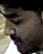

{'detected_emotion': 'happy', 'confidence_score': 0.76, 'happy_prob': 0.76, 'sad_prob': 0.21, 'neutral_prob': 0.03}


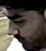

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.01, 'sad_prob': 0.96, 'neutral_prob': 0.03}


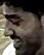

{'detected_emotion': 'sad', 'confidence_score': 0.94, 'happy_prob': 0.01, 'sad_prob': 0.94, 'neutral_prob': 0.05}


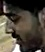

{'detected_emotion': 'sad', 'confidence_score': 0.74, 'happy_prob': 0.03, 'sad_prob': 0.74, 'neutral_prob': 0.22}


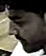

{'detected_emotion': 'sad', 'confidence_score': 0.82, 'happy_prob': 0.05, 'sad_prob': 0.82, 'neutral_prob': 0.12}


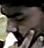

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.11, 'sad_prob': 0.87, 'neutral_prob': 0.01}


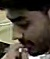

{'detected_emotion': 'sad', 'confidence_score': 0.72, 'happy_prob': 0.24, 'sad_prob': 0.72, 'neutral_prob': 0.04}


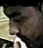

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.01}


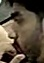

{'detected_emotion': 'sad', 'confidence_score': 0.77, 'happy_prob': 0.09, 'sad_prob': 0.77, 'neutral_prob': 0.14}


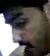

{'detected_emotion': 'neutral', 'confidence_score': 0.52, 'happy_prob': 0.11, 'sad_prob': 0.36, 'neutral_prob': 0.52}


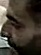

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.01, 'sad_prob': 0.97, 'neutral_prob': 0.02}


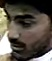

{'detected_emotion': 'sad', 'confidence_score': 0.64, 'happy_prob': 0.31, 'sad_prob': 0.64, 'neutral_prob': 0.05}


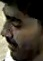

{'detected_emotion': 'happy', 'confidence_score': 0.65, 'happy_prob': 0.65, 'sad_prob': 0.27, 'neutral_prob': 0.08}


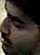

{'detected_emotion': 'sad', 'confidence_score': 0.6, 'happy_prob': 0.02, 'sad_prob': 0.6, 'neutral_prob': 0.38}


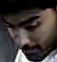

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.01, 'sad_prob': 0.86, 'neutral_prob': 0.12}


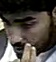

{'detected_emotion': 'happy', 'confidence_score': 0.69, 'happy_prob': 0.69, 'sad_prob': 0.16, 'neutral_prob': 0.15}


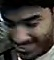

{'detected_emotion': 'sad', 'confidence_score': 0.89, 'happy_prob': 0.01, 'sad_prob': 0.89, 'neutral_prob': 0.1}


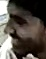

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.01, 'sad_prob': 0.86, 'neutral_prob': 0.13}


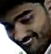

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.04, 'sad_prob': 0.92, 'neutral_prob': 0.04}


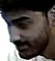

{'detected_emotion': 'neutral', 'confidence_score': 0.54, 'happy_prob': 0.31, 'sad_prob': 0.14, 'neutral_prob': 0.54}


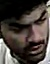

{'detected_emotion': 'neutral', 'confidence_score': 0.89, 'happy_prob': 0.01, 'sad_prob': 0.1, 'neutral_prob': 0.89}


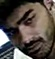

{'detected_emotion': 'sad', 'confidence_score': 0.85, 'happy_prob': 0.01, 'sad_prob': 0.85, 'neutral_prob': 0.14}


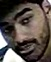

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


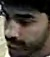

{'detected_emotion': 'sad', 'confidence_score': 0.5, 'happy_prob': 0.48, 'sad_prob': 0.5, 'neutral_prob': 0.02}


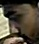

{'detected_emotion': 'sad', 'confidence_score': 0.49, 'happy_prob': 0.4, 'sad_prob': 0.49, 'neutral_prob': 0.11}


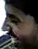

{'detected_emotion': 'sad', 'confidence_score': 0.93, 'happy_prob': 0.01, 'sad_prob': 0.93, 'neutral_prob': 0.05}


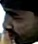

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.03, 'sad_prob': 0.96, 'neutral_prob': 0.0}


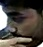

{'detected_emotion': 'happy', 'confidence_score': 0.86, 'happy_prob': 0.86, 'sad_prob': 0.03, 'neutral_prob': 0.11}


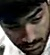

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.03, 'sad_prob': 0.87, 'neutral_prob': 0.1}


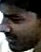

{'detected_emotion': 'sad', 'confidence_score': 0.84, 'happy_prob': 0.01, 'sad_prob': 0.84, 'neutral_prob': 0.15}


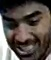

{'detected_emotion': 'sad', 'confidence_score': 0.7, 'happy_prob': 0.01, 'sad_prob': 0.7, 'neutral_prob': 0.29}


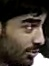

{'detected_emotion': 'sad', 'confidence_score': 0.79, 'happy_prob': 0.03, 'sad_prob': 0.79, 'neutral_prob': 0.17}


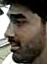

{'detected_emotion': 'sad', 'confidence_score': 0.51, 'happy_prob': 0.45, 'sad_prob': 0.51, 'neutral_prob': 0.03}


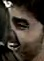

{'detected_emotion': 'sad', 'confidence_score': 0.54, 'happy_prob': 0.02, 'sad_prob': 0.54, 'neutral_prob': 0.44}


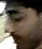

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.05, 'sad_prob': 0.73, 'neutral_prob': 0.22}


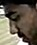

{'detected_emotion': 'sad', 'confidence_score': 0.85, 'happy_prob': 0.11, 'sad_prob': 0.85, 'neutral_prob': 0.04}


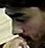

{'detected_emotion': 'happy', 'confidence_score': 0.67, 'happy_prob': 0.67, 'sad_prob': 0.31, 'neutral_prob': 0.02}


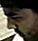

{'detected_emotion': 'sad', 'confidence_score': 0.76, 'happy_prob': 0.2, 'sad_prob': 0.76, 'neutral_prob': 0.03}


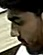

{'detected_emotion': 'happy', 'confidence_score': 0.56, 'happy_prob': 0.56, 'sad_prob': 0.41, 'neutral_prob': 0.03}


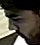

{'detected_emotion': 'sad', 'confidence_score': 0.89, 'happy_prob': 0.03, 'sad_prob': 0.89, 'neutral_prob': 0.08}


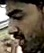

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.02, 'sad_prob': 0.9, 'neutral_prob': 0.08}


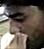

{'detected_emotion': 'happy', 'confidence_score': 0.92, 'happy_prob': 0.92, 'sad_prob': 0.03, 'neutral_prob': 0.05}


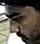

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.0, 'sad_prob': 0.97, 'neutral_prob': 0.02}


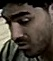

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.0, 'sad_prob': 0.96, 'neutral_prob': 0.03}


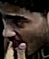

{'detected_emotion': 'sad', 'confidence_score': 0.85, 'happy_prob': 0.08, 'sad_prob': 0.85, 'neutral_prob': 0.07}


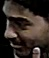

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.02, 'sad_prob': 0.95, 'neutral_prob': 0.03}


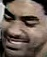

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.02, 'sad_prob': 0.92, 'neutral_prob': 0.06}


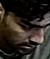

{'detected_emotion': 'sad', 'confidence_score': 0.65, 'happy_prob': 0.05, 'sad_prob': 0.65, 'neutral_prob': 0.3}


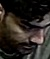

{'detected_emotion': 'neutral', 'confidence_score': 0.76, 'happy_prob': 0.03, 'sad_prob': 0.21, 'neutral_prob': 0.76}


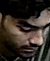

{'detected_emotion': 'sad', 'confidence_score': 0.8, 'happy_prob': 0.06, 'sad_prob': 0.8, 'neutral_prob': 0.14}


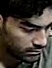

{'detected_emotion': 'sad', 'confidence_score': 0.74, 'happy_prob': 0.1, 'sad_prob': 0.74, 'neutral_prob': 0.15}


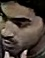

{'detected_emotion': 'happy', 'confidence_score': 1.0, 'happy_prob': 1.0, 'sad_prob': 0.0, 'neutral_prob': 0.0}


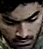

{'detected_emotion': 'happy', 'confidence_score': 1.0, 'happy_prob': 1.0, 'sad_prob': 0.0, 'neutral_prob': 0.0}


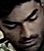

{'detected_emotion': 'neutral', 'confidence_score': 0.84, 'happy_prob': 0.02, 'sad_prob': 0.14, 'neutral_prob': 0.84}


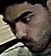

{'detected_emotion': 'happy', 'confidence_score': 0.74, 'happy_prob': 0.74, 'sad_prob': 0.24, 'neutral_prob': 0.02}


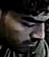

{'detected_emotion': 'happy', 'confidence_score': 0.78, 'happy_prob': 0.78, 'sad_prob': 0.15, 'neutral_prob': 0.07}


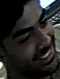

{'detected_emotion': 'sad', 'confidence_score': 0.61, 'happy_prob': 0.01, 'sad_prob': 0.61, 'neutral_prob': 0.38}


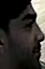

{'detected_emotion': 'sad', 'confidence_score': 0.82, 'happy_prob': 0.03, 'sad_prob': 0.82, 'neutral_prob': 0.15}


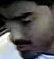

{'detected_emotion': 'sad', 'confidence_score': 0.93, 'happy_prob': 0.01, 'sad_prob': 0.93, 'neutral_prob': 0.07}


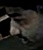

{'detected_emotion': 'sad', 'confidence_score': 0.75, 'happy_prob': 0.01, 'sad_prob': 0.75, 'neutral_prob': 0.24}


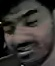

{'detected_emotion': 'sad', 'confidence_score': 0.71, 'happy_prob': 0.07, 'sad_prob': 0.71, 'neutral_prob': 0.21}


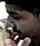

{'detected_emotion': 'sad', 'confidence_score': 0.8, 'happy_prob': 0.06, 'sad_prob': 0.8, 'neutral_prob': 0.14}


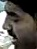

{'detected_emotion': 'happy', 'confidence_score': 0.46, 'happy_prob': 0.46, 'sad_prob': 0.3, 'neutral_prob': 0.22}


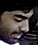

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.09, 'sad_prob': 0.9, 'neutral_prob': 0.01}


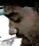

{'detected_emotion': 'neutral', 'confidence_score': 0.72, 'happy_prob': 0.06, 'sad_prob': 0.22, 'neutral_prob': 0.72}


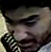

{'detected_emotion': 'sad', 'confidence_score': 0.84, 'happy_prob': 0.09, 'sad_prob': 0.84, 'neutral_prob': 0.07}


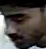

{'detected_emotion': 'happy', 'confidence_score': 0.96, 'happy_prob': 0.96, 'sad_prob': 0.03, 'neutral_prob': 0.02}


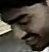

{'detected_emotion': 'sad', 'confidence_score': 0.62, 'happy_prob': 0.25, 'sad_prob': 0.62, 'neutral_prob': 0.12}


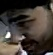

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.02, 'sad_prob': 0.9, 'neutral_prob': 0.08}


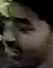

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.03, 'sad_prob': 0.96, 'neutral_prob': 0.01}


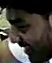

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.05, 'sad_prob': 0.92, 'neutral_prob': 0.03}


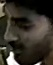

{'detected_emotion': 'sad', 'confidence_score': 0.79, 'happy_prob': 0.01, 'sad_prob': 0.79, 'neutral_prob': 0.21}


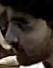

{'detected_emotion': 'sad', 'confidence_score': 0.91, 'happy_prob': 0.03, 'sad_prob': 0.91, 'neutral_prob': 0.06}


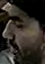

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.01, 'sad_prob': 0.97, 'neutral_prob': 0.01}


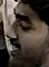

{'detected_emotion': 'sad', 'confidence_score': 0.61, 'happy_prob': 0.01, 'sad_prob': 0.61, 'neutral_prob': 0.37}


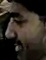

{'detected_emotion': 'neutral', 'confidence_score': 0.6, 'happy_prob': 0.01, 'sad_prob': 0.38, 'neutral_prob': 0.6}


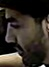

{'detected_emotion': 'sad', 'confidence_score': 0.77, 'happy_prob': 0.09, 'sad_prob': 0.77, 'neutral_prob': 0.14}


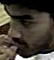

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.03, 'sad_prob': 0.96, 'neutral_prob': 0.01}


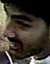

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


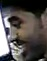

{'detected_emotion': 'sad', 'confidence_score': 0.88, 'happy_prob': 0.01, 'sad_prob': 0.88, 'neutral_prob': 0.1}


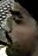

{'detected_emotion': 'sad', 'confidence_score': 0.71, 'happy_prob': 0.0, 'sad_prob': 0.71, 'neutral_prob': 0.29}


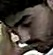

{'detected_emotion': 'sad', 'confidence_score': 0.68, 'happy_prob': 0.03, 'sad_prob': 0.68, 'neutral_prob': 0.29}


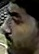

{'detected_emotion': 'sad', 'confidence_score': 0.67, 'happy_prob': 0.31, 'sad_prob': 0.67, 'neutral_prob': 0.03}


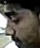

{'detected_emotion': 'happy', 'confidence_score': 0.9, 'happy_prob': 0.9, 'sad_prob': 0.09, 'neutral_prob': 0.01}


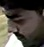

{'detected_emotion': 'sad', 'confidence_score': 0.56, 'happy_prob': 0.33, 'sad_prob': 0.56, 'neutral_prob': 0.11}


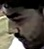

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.19, 'sad_prob': 0.73, 'neutral_prob': 0.09}


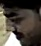

{'detected_emotion': 'sad', 'confidence_score': 0.66, 'happy_prob': 0.19, 'sad_prob': 0.66, 'neutral_prob': 0.15}


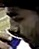

{'detected_emotion': 'sad', 'confidence_score': 0.68, 'happy_prob': 0.21, 'sad_prob': 0.68, 'neutral_prob': 0.11}


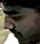

{'detected_emotion': 'sad', 'confidence_score': 0.66, 'happy_prob': 0.12, 'sad_prob': 0.66, 'neutral_prob': 0.22}


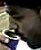

{'detected_emotion': 'sad', 'confidence_score': 0.52, 'happy_prob': 0.36, 'sad_prob': 0.52, 'neutral_prob': 0.11}


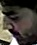

{'detected_emotion': 'sad', 'confidence_score': 0.63, 'happy_prob': 0.32, 'sad_prob': 0.63, 'neutral_prob': 0.04}


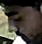

{'detected_emotion': 'sad', 'confidence_score': 0.59, 'happy_prob': 0.19, 'sad_prob': 0.59, 'neutral_prob': 0.22}


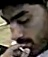

{'detected_emotion': 'sad', 'confidence_score': 0.8, 'happy_prob': 0.16, 'sad_prob': 0.8, 'neutral_prob': 0.04}


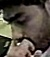

{'detected_emotion': 'happy', 'confidence_score': 0.55, 'happy_prob': 0.55, 'sad_prob': 0.44, 'neutral_prob': 0.01}


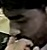

{'detected_emotion': 'sad', 'confidence_score': 0.72, 'happy_prob': 0.24, 'sad_prob': 0.72, 'neutral_prob': 0.04}


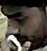

{'detected_emotion': 'happy', 'confidence_score': 0.6, 'happy_prob': 0.6, 'sad_prob': 0.09, 'neutral_prob': 0.31}


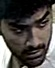

{'detected_emotion': 'sad', 'confidence_score': 0.93, 'happy_prob': 0.01, 'sad_prob': 0.93, 'neutral_prob': 0.06}


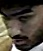

{'detected_emotion': 'neutral', 'confidence_score': 0.49, 'happy_prob': 0.04, 'sad_prob': 0.47, 'neutral_prob': 0.49}


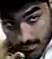

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.03, 'sad_prob': 0.95, 'neutral_prob': 0.02}


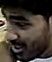

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.06, 'sad_prob': 0.87, 'neutral_prob': 0.06}


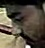

{'detected_emotion': 'sad', 'confidence_score': 0.57, 'happy_prob': 0.26, 'sad_prob': 0.57, 'neutral_prob': 0.16}


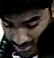

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.0}


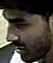

{'detected_emotion': 'sad', 'confidence_score': 0.91, 'happy_prob': 0.02, 'sad_prob': 0.91, 'neutral_prob': 0.07}


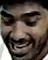

{'detected_emotion': 'sad', 'confidence_score': 0.66, 'happy_prob': 0.02, 'sad_prob': 0.66, 'neutral_prob': 0.32}


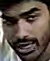

{'detected_emotion': 'happy', 'confidence_score': 0.67, 'happy_prob': 0.67, 'sad_prob': 0.29, 'neutral_prob': 0.04}


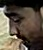

{'detected_emotion': 'sad', 'confidence_score': 0.72, 'happy_prob': 0.25, 'sad_prob': 0.72, 'neutral_prob': 0.03}


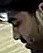

{'detected_emotion': 'happy', 'confidence_score': 0.65, 'happy_prob': 0.65, 'sad_prob': 0.32, 'neutral_prob': 0.03}


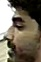

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.01}


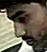

{'detected_emotion': 'happy', 'confidence_score': 0.67, 'happy_prob': 0.67, 'sad_prob': 0.3, 'neutral_prob': 0.03}


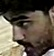

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.07, 'sad_prob': 0.87, 'neutral_prob': 0.06}


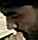

{'detected_emotion': 'happy', 'confidence_score': 0.93, 'happy_prob': 0.93, 'sad_prob': 0.04, 'neutral_prob': 0.03}


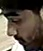

{'detected_emotion': 'happy', 'confidence_score': 0.85, 'happy_prob': 0.85, 'sad_prob': 0.14, 'neutral_prob': 0.01}


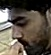

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.09, 'sad_prob': 0.73, 'neutral_prob': 0.17}


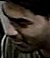

{'detected_emotion': 'sad', 'confidence_score': 0.77, 'happy_prob': 0.02, 'sad_prob': 0.77, 'neutral_prob': 0.21}


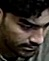

{'detected_emotion': 'neutral', 'confidence_score': 0.55, 'happy_prob': 0.07, 'sad_prob': 0.37, 'neutral_prob': 0.55}


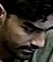

{'detected_emotion': 'sad', 'confidence_score': 0.86, 'happy_prob': 0.02, 'sad_prob': 0.86, 'neutral_prob': 0.12}


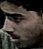

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.01, 'sad_prob': 0.96, 'neutral_prob': 0.03}


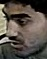

{'detected_emotion': 'happy', 'confidence_score': 0.57, 'happy_prob': 0.57, 'sad_prob': 0.31, 'neutral_prob': 0.12}


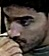

{'detected_emotion': 'neutral', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.01, 'neutral_prob': 0.99}


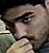

{'detected_emotion': 'happy', 'confidence_score': 0.95, 'happy_prob': 0.95, 'sad_prob': 0.04, 'neutral_prob': 0.01}


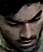

{'detected_emotion': 'happy', 'confidence_score': 1.0, 'happy_prob': 1.0, 'sad_prob': 0.0, 'neutral_prob': 0.0}


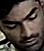

{'detected_emotion': 'neutral', 'confidence_score': 0.49, 'happy_prob': 0.2, 'sad_prob': 0.3, 'neutral_prob': 0.49}


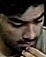

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.02, 'sad_prob': 0.92, 'neutral_prob': 0.06}


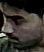

{'detected_emotion': 'sad', 'confidence_score': 0.67, 'happy_prob': 0.05, 'sad_prob': 0.67, 'neutral_prob': 0.28}


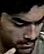

{'detected_emotion': 'neutral', 'confidence_score': 0.51, 'happy_prob': 0.05, 'sad_prob': 0.43, 'neutral_prob': 0.51}


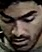

{'detected_emotion': 'happy', 'confidence_score': 1.0, 'happy_prob': 1.0, 'sad_prob': 0.0, 'neutral_prob': 0.0}


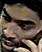

{'detected_emotion': 'sad', 'confidence_score': 0.65, 'happy_prob': 0.27, 'sad_prob': 0.65, 'neutral_prob': 0.08}


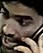

{'detected_emotion': 'sad', 'confidence_score': 0.53, 'happy_prob': 0.08, 'sad_prob': 0.53, 'neutral_prob': 0.38}


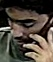

{'detected_emotion': 'happy', 'confidence_score': 0.99, 'happy_prob': 0.99, 'sad_prob': 0.01, 'neutral_prob': 0.0}


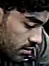

{'detected_emotion': 'sad', 'confidence_score': 0.49, 'happy_prob': 0.36, 'sad_prob': 0.49, 'neutral_prob': 0.14}


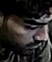

{'detected_emotion': 'sad', 'confidence_score': 0.83, 'happy_prob': 0.05, 'sad_prob': 0.83, 'neutral_prob': 0.12}


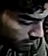

{'detected_emotion': 'neutral', 'confidence_score': 0.53, 'happy_prob': 0.26, 'sad_prob': 0.19, 'neutral_prob': 0.53}


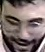

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.01, 'sad_prob': 0.73, 'neutral_prob': 0.26}


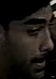

{'detected_emotion': 'sad', 'confidence_score': 0.51, 'happy_prob': 0.0, 'sad_prob': 0.51, 'neutral_prob': 0.48}


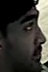

{'detected_emotion': 'sad', 'confidence_score': 0.77, 'happy_prob': 0.02, 'sad_prob': 0.77, 'neutral_prob': 0.21}


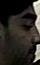

{'detected_emotion': 'sad', 'confidence_score': 0.4, 'happy_prob': 0.39, 'sad_prob': 0.4, 'neutral_prob': 0.2}


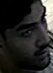

{'detected_emotion': 'sad', 'confidence_score': 0.61, 'happy_prob': 0.01, 'sad_prob': 0.61, 'neutral_prob': 0.38}


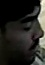

{'detected_emotion': 'sad', 'confidence_score': 0.55, 'happy_prob': 0.03, 'sad_prob': 0.55, 'neutral_prob': 0.41}


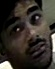

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.01}


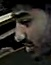

{'detected_emotion': 'neutral', 'confidence_score': 0.83, 'happy_prob': 0.02, 'sad_prob': 0.15, 'neutral_prob': 0.83}


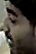

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.02, 'sad_prob': 0.95, 'neutral_prob': 0.03}


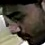

{'detected_emotion': 'sad', 'confidence_score': 0.73, 'happy_prob': 0.25, 'sad_prob': 0.73, 'neutral_prob': 0.02}


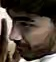

{'detected_emotion': 'sad', 'confidence_score': 0.59, 'happy_prob': 0.37, 'sad_prob': 0.59, 'neutral_prob': 0.04}


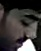

{'detected_emotion': 'sad', 'confidence_score': 0.95, 'happy_prob': 0.01, 'sad_prob': 0.95, 'neutral_prob': 0.05}


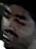

{'detected_emotion': 'sad', 'confidence_score': 0.8, 'happy_prob': 0.04, 'sad_prob': 0.8, 'neutral_prob': 0.16}


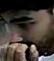

{'detected_emotion': 'sad', 'confidence_score': 0.59, 'happy_prob': 0.01, 'sad_prob': 0.59, 'neutral_prob': 0.4}


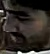

{'detected_emotion': 'sad', 'confidence_score': 0.74, 'happy_prob': 0.07, 'sad_prob': 0.74, 'neutral_prob': 0.19}


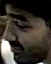

{'detected_emotion': 'happy', 'confidence_score': 0.91, 'happy_prob': 0.91, 'sad_prob': 0.08, 'neutral_prob': 0.0}


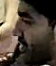

{'detected_emotion': 'sad', 'confidence_score': 0.83, 'happy_prob': 0.03, 'sad_prob': 0.83, 'neutral_prob': 0.14}


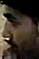

{'detected_emotion': 'sad', 'confidence_score': 0.5, 'happy_prob': 0.04, 'sad_prob': 0.5, 'neutral_prob': 0.46}


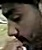

{'detected_emotion': 'sad', 'confidence_score': 0.9, 'happy_prob': 0.06, 'sad_prob': 0.9, 'neutral_prob': 0.04}


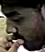

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


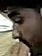

{'detected_emotion': 'sad', 'confidence_score': 0.82, 'happy_prob': 0.05, 'sad_prob': 0.82, 'neutral_prob': 0.13}


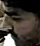

{'detected_emotion': 'happy', 'confidence_score': 0.8, 'happy_prob': 0.8, 'sad_prob': 0.16, 'neutral_prob': 0.04}


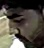

{'detected_emotion': 'happy', 'confidence_score': 0.38, 'happy_prob': 0.38, 'sad_prob': 0.36, 'neutral_prob': 0.24}


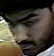

{'detected_emotion': 'sad', 'confidence_score': 0.94, 'happy_prob': 0.03, 'sad_prob': 0.94, 'neutral_prob': 0.03}


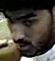

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.0, 'sad_prob': 0.92, 'neutral_prob': 0.07}


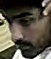

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.01, 'sad_prob': 0.92, 'neutral_prob': 0.06}


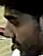

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.01, 'sad_prob': 0.92, 'neutral_prob': 0.07}


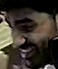

{'detected_emotion': 'sad', 'confidence_score': 0.77, 'happy_prob': 0.19, 'sad_prob': 0.77, 'neutral_prob': 0.03}


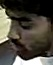

{'detected_emotion': 'sad', 'confidence_score': 0.75, 'happy_prob': 0.04, 'sad_prob': 0.75, 'neutral_prob': 0.21}


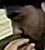

{'detected_emotion': 'neutral', 'confidence_score': 0.47, 'happy_prob': 0.11, 'sad_prob': 0.42, 'neutral_prob': 0.47}


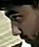

{'detected_emotion': 'sad', 'confidence_score': 0.76, 'happy_prob': 0.03, 'sad_prob': 0.76, 'neutral_prob': 0.21}


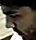

{'detected_emotion': 'sad', 'confidence_score': 0.96, 'happy_prob': 0.01, 'sad_prob': 0.96, 'neutral_prob': 0.03}


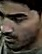

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.01}


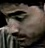

{'detected_emotion': 'sad', 'confidence_score': 0.87, 'happy_prob': 0.01, 'sad_prob': 0.87, 'neutral_prob': 0.12}


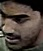

{'detected_emotion': 'happy', 'confidence_score': 0.99, 'happy_prob': 0.99, 'sad_prob': 0.0, 'neutral_prob': 0.0}


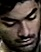

{'detected_emotion': 'happy', 'confidence_score': 0.97, 'happy_prob': 0.97, 'sad_prob': 0.01, 'neutral_prob': 0.02}


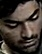

{'detected_emotion': 'happy', 'confidence_score': 0.96, 'happy_prob': 0.96, 'sad_prob': 0.03, 'neutral_prob': 0.01}


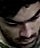

{'detected_emotion': 'neutral', 'confidence_score': 0.92, 'happy_prob': 0.01, 'sad_prob': 0.06, 'neutral_prob': 0.92}


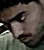

{'detected_emotion': 'happy', 'confidence_score': 0.59, 'happy_prob': 0.59, 'sad_prob': 0.1, 'neutral_prob': 0.31}


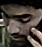

{'detected_emotion': 'sad', 'confidence_score': 0.6, 'happy_prob': 0.02, 'sad_prob': 0.6, 'neutral_prob': 0.38}


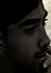

{'detected_emotion': 'neutral', 'confidence_score': 0.56, 'happy_prob': 0.03, 'sad_prob': 0.41, 'neutral_prob': 0.56}


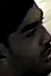

{'detected_emotion': 'sad', 'confidence_score': 0.57, 'happy_prob': 0.02, 'sad_prob': 0.57, 'neutral_prob': 0.41}


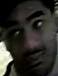

{'detected_emotion': 'sad', 'confidence_score': 0.65, 'happy_prob': 0.05, 'sad_prob': 0.65, 'neutral_prob': 0.3}


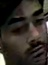

{'detected_emotion': 'sad', 'confidence_score': 0.84, 'happy_prob': 0.04, 'sad_prob': 0.84, 'neutral_prob': 0.11}


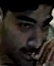

{'detected_emotion': 'sad', 'confidence_score': 0.98, 'happy_prob': 0.0, 'sad_prob': 0.98, 'neutral_prob': 0.01}


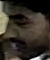

{'detected_emotion': 'sad', 'confidence_score': 0.56, 'happy_prob': 0.42, 'sad_prob': 0.56, 'neutral_prob': 0.02}


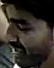

{'detected_emotion': 'sad', 'confidence_score': 0.7, 'happy_prob': 0.1, 'sad_prob': 0.7, 'neutral_prob': 0.2}


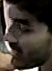

{'detected_emotion': 'sad', 'confidence_score': 0.77, 'happy_prob': 0.05, 'sad_prob': 0.77, 'neutral_prob': 0.18}


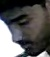

{'detected_emotion': 'sad', 'confidence_score': 0.64, 'happy_prob': 0.1, 'sad_prob': 0.64, 'neutral_prob': 0.26}


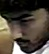

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.0}


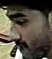

{'detected_emotion': 'sad', 'confidence_score': 0.91, 'happy_prob': 0.0, 'sad_prob': 0.91, 'neutral_prob': 0.09}


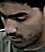

{'detected_emotion': 'sad', 'confidence_score': 0.92, 'happy_prob': 0.02, 'sad_prob': 0.92, 'neutral_prob': 0.06}


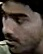

{'detected_emotion': 'sad', 'confidence_score': 0.75, 'happy_prob': 0.01, 'sad_prob': 0.75, 'neutral_prob': 0.24}


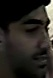

{'detected_emotion': 'neutral', 'confidence_score': 0.61, 'happy_prob': 0.03, 'sad_prob': 0.36, 'neutral_prob': 0.61}


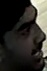

{'detected_emotion': 'sad', 'confidence_score': 0.61, 'happy_prob': 0.04, 'sad_prob': 0.61, 'neutral_prob': 0.34}


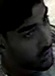

{'detected_emotion': 'happy', 'confidence_score': 0.66, 'happy_prob': 0.66, 'sad_prob': 0.3, 'neutral_prob': 0.04}


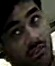

{'detected_emotion': 'neutral', 'confidence_score': 0.6, 'happy_prob': 0.02, 'sad_prob': 0.38, 'neutral_prob': 0.6}


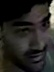

{'detected_emotion': 'happy', 'confidence_score': 0.64, 'happy_prob': 0.64, 'sad_prob': 0.3, 'neutral_prob': 0.06}


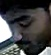

{'detected_emotion': 'sad', 'confidence_score': 0.77, 'happy_prob': 0.05, 'sad_prob': 0.77, 'neutral_prob': 0.18}


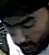

{'detected_emotion': 'sad', 'confidence_score': 0.93, 'happy_prob': 0.0, 'sad_prob': 0.93, 'neutral_prob': 0.07}


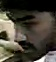

{'detected_emotion': 'sad', 'confidence_score': 0.6, 'happy_prob': 0.01, 'sad_prob': 0.6, 'neutral_prob': 0.4}


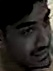

{'detected_emotion': 'sad', 'confidence_score': 0.99, 'happy_prob': 0.0, 'sad_prob': 0.99, 'neutral_prob': 0.0}


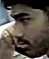

{'detected_emotion': 'sad', 'confidence_score': 0.97, 'happy_prob': 0.01, 'sad_prob': 0.97, 'neutral_prob': 0.03}


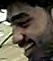

In [24]:
from IPython.display import display
from IPython.display import Image as IPYTHON_img_class
from PIL import Image as PIL_img_class 

person_dir = "Persons_Faces"
person_id = "person_0"
person_path = os.path.join(person_dir,person_id)

list_of_images = os.listdir(person_path)
for img_name in list_of_images:
    if img_name.endswith((".jpg",".png")):
        img_path = os.path.join(person_path,img_name)
        image = cv.imread(img_path)
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        pil_img = PIL_img_class.fromarray(gray_image)
        results = detect_emotion(pil_img)
        print(results)
        display(IPYTHON_img_class(filename=img_path))


# image = cv.imread("Persons_Faces/person_0/face_0_1752485513_62.jpg")
# gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# pil_img = Image.fromarray(gray_image)

# print(detect_emotion(pil_img))


# img_tensor = transform(pil_img).unsqueeze(0).to(device)
# with torch.no_grad():
#     outputs = loaded_model(img_tensor)
#     probabilities = F.softmax(outputs, dim=1)
# scores = probabilities.cpu().numpy().flatten()
# rounded_scores = [round(score, 2) for score in scores]
# max_index = np.argmax(rounded_scores)
# max_emotion = emotions[max_index]

In [7]:
people_name = { 
        'person_0':'Eyad Masoud', 
        'person_3':'Habiba Gharabawy',
        'person_6':'Abdelrahman Azabawy',
        'person_7':'Zeyad El-Sheikh',
        'person_8':'Mohamed Fahmy',
        'person_14':'Hala Refaey',
        'person_17':'Helen Bakhoum',
        'person_43':'Mohamed Tawfeek'
        }

person_folder = 'person_9'

person_name = people_name.get(person_folder, person_folder)
print(type(person_name))

<class 'str'>


In [2]:
accumulated_faces = [1,2,3]
accumulated_faces_copy = accumulated_faces.copy()

accumulated_faces.clear()
print(accumulated_faces_copy)
print(accumulated_faces)

[1, 2, 3]
[]
